In [1]:
import pandas as pd, numpy as np, os, seaborn as sns, matplotlib.pyplot as plt, matplotlib.ticker as ticker, \
json, sys, site, pylogit as pl
from matplotlib import rcParams
from datetime import date
%matplotlib inline
pd.set_option('display.precision',3)

In [2]:
print('last updated: ' + date.today().strftime("%m/%d/%Y"))

last updated: 07/03/2020


## Part 1 - Load Data

In [3]:
sacog = pd.read_excel('SACOG intake - final_June 5, 2020_14.33.xlsx', skiprows = [0], encoding = 'utf-8')
sacog.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Has your household income been affected by the COVID-19 pandemic thus far?,Have the Shelter in Place/Stay at Home orders increased your responsibilities in any of the following ways?\n\n\n\nPlease select all that apply.,"You're a survey master! Please pick your $10 gift card and let us know where to send it before you go. \n\nPlease choose from amongst the options below, available from https://www.giftbit.com/rewards/ (make sure that USA is selected in the top left).","Please provide an address to which we can send your gift card!\n \n\nWe can either distribute your gift card via email, or via physical mail. Due to COVID-19 delivery issues, physical distribution of gift cards is not possible until Shelter in Place orders have been lifted in Alameda County. Currently, the orders are in effect until at least the end of May 2020, and we cannot provide an estimate for the delivery of physical gift cards.\n\n \n\nVirtual gift cards will be distributed within three weeks of the study closing date, which is one- to two-weeks from when were invited to participate. \n\n \n\nIf you do not provide a valid email or mailing address, we will be unable to distribute your gift card. - Email address","Please provide an address to which we can send your gift card!\n \n\nWe can either distribute your gift card via email, or via physical mail. Due to COVID-19 delivery issues, physical distribution of gift cards is not possible until Shelter in Place orders have been lifted in Alameda County. Currently, the orders are in effect until at least the end of May 2020, and we cannot provide an estimate for the delivery of physical gift cards.\n\n \n\nVirtual gift cards will be distributed within three weeks of the study closing date, which is one- to two-weeks from when were invited to participate. \n\n \n\nIf you do not provide a valid email or mailing address, we will be unable to distribute your gift card. - Mailing address","Are you willing to participate in future studies?\n\n\n\nIf you are willing to participate in future studies (e.g., surveys, interviews, or focus groups) related to shopping and deliveries, you may be provided a link by which to complete additional forms and researchers may contact you regarding future participation. Future studies may include incentives (e.g., gift cards, promotional discounts) for participation.\n \n\nAt this time, participation in future panel phases will make your household eligible to receive one $150 gift card during each panel phase. Additionally, If you are contacted about participating in phone, teleconference, or video interviews, you will receive one $25 gift card per interview.","If you have any feedback on this survey, please provide it below.\n\n\n\nWere any questions unclear? Were certain questions annoying to answer? Did you have to look somewhere unexpected to be able to answer any questions?\n \n\nBe advised that your responses will be read by a real human being, so please try to keep your feedback as constructive as possible.",Random ID,ResponseID,DeviceIdentifier
0,2020-05-25 12:07:41,2020-05-25 12:40:19,IP Address,98.208.112.200,100,1957,True,2020-05-25 12:40:20.264,R_3HLKBXhTIWgpd5v,NaN,...,"Yes, decreased",Prefer not to answer,Walmart,bhaktavar.baba@gmail.com,9444 Harbour Point Drive\nUnit Number 50,Yes,NaN,542189,R_3HLKBXhTIWgpd5v,NaN
1,2020-05-25 12:10:20,2020-05-25 12:40:47,IP Address,75.111.25.35,100,1826,True,2020-05-25 12:40:48.693,R_2dgBf5xYdf4pJDs,NaN,...,NaN,Prefer not to answer,Amazon,vmwales@gmail.com,"PO Box 144\nFields Landing, CA 95537",Yes,NaN,153740,R_2dgBf5xYdf4pJDs,NaN
2,2020-05-25 12:15:34,2020-05-25 12:43:10,IP Address,107.138.66.44,100,1655,True,2020-05-25 12:43:11.046,R_wXWh8mxuoPtnAWt,NaN,...,NaN,Prefer not to answer,Amazon,Texastoads@sbcglobal.net,1399 Sacramento Ave Unit 54 West Sacramento Ca...,Yes,NaN,269033,R_wXWh8mxuoPtnAWt,NaN

### 1.1 Users

In [4]:
len(sacog)

327

All 327 records are completed surveys.

In [5]:
sacog['Progress'].sort_values()

0      100
221    100
220    100
219    100
218    100
      ... 
105    100
104    100
103    100
121    100
326    100
Name: Progress, Length: 327, dtype: int64

In [6]:
for i in range(len(sacog.columns)):
    print(i, sacog.columns[i])

0 Start Date
1 End Date
2 Response Type
3 IP Address
4 Progress
5 Duration (in seconds)
6 Finished
7 Recorded Date
8 Response ID
9 Recipient Last Name
10 Recipient First Name
11 Recipient Email
12 External Data Reference
13 Location Latitude
14 Location Longitude
15 Distribution Channel
16 User Language
17 Q_RecaptchaScore
18 Participant Consent
19 What is your age group?
20 In what county do you currently reside?
21 Please write the name of your county of residence below.
22 What is the zip code of your household?
23 What are the nearest cross streets to your current household? - Cross street 1
24 What are the nearest cross streets to your current household? - Cross street 2
25 How did you fill out the 2018 Sacramento Area Council of Governments (SACOG) Household travel survey in May, 2018? - Selected Choice
26 How did you fill out the 2018 Sacramento Area Council of Governments (SACOG) Household travel survey in May, 2018? - Something else - Text
27 Do you still live with the househo

724 When shopping online or by mobile app, how do you track your orders? You may have to scroll to th... - I check the detailed tracking information online. - Prepared food:
725 When shopping online or by mobile app, how do you track your orders? You may have to scroll to th... - I check the detailed tracking information online. - Groceries:
726 When shopping online or by mobile app, how do you track your orders? You may have to scroll to th... - None of these. - Parcels/non-food:
727 When shopping online or by mobile app, how do you track your orders? You may have to scroll to th... - None of these. - Prepared food:
728 When shopping online or by mobile app, how do you track your orders? You may have to scroll to th... - None of these. - Groceries:
729 When shopping online or by mobile app, how do you track your orders? You may have to scroll to th... - I keep track via the app which I made the purchase. - Parcels/non-food:
730 When shopping online or by mobile app, how do you track y

Most respondents' IP addresses pinged from California and specifically the Bay Area, but other respondents were located in other parts of the country (VPNs, just away from home, etc.)

In [7]:
sacog[['Location Latitude', 'Location Longitude']]

,Location Latitude,Location Longitude
0,38.482,-121.402
1,40.876,-124.076
2,38.566,-121.553
3,38.661,-121.264
4,38.545,-121.745
...,...,...
322,38.482,-121.402
323,38.641,-121.511
324,38.697,-121.313
325,38.482,-121.402


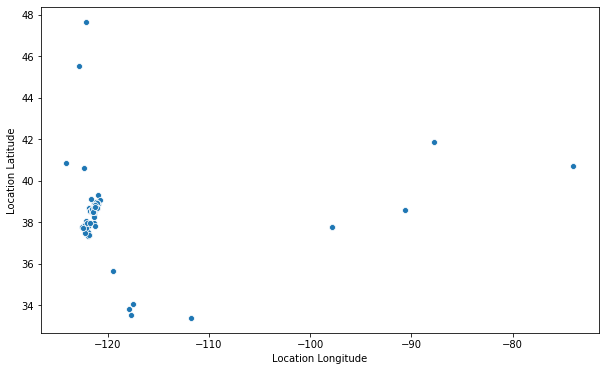

In [8]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax = sns.scatterplot(x = 'Location Longitude', y = 'Location Latitude', data = sacog, ax = ax)
#ax.set_ylabel('Count');

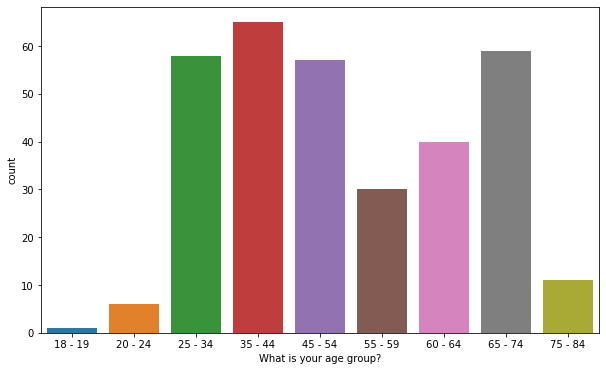

In [9]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax = sns.countplot(sacog['What is your age group?'], order = sorted(sacog['What is your age group?'].unique()))
#ax.set_ylabel('Count');

In [10]:
np.mean(sacog['In what county do you currently reside?'].notna())

1.0

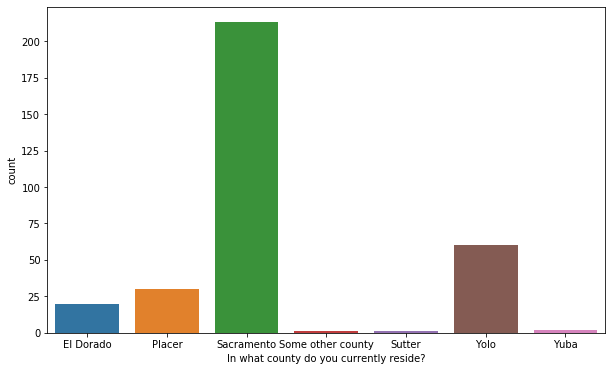

In [11]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax = sns.countplot(sacog['In what county do you currently reside?'], order = sorted(sacog['In what county do you currently reside?'].unique()))
#ax.set_ylabel('Count');

In [12]:
sacog['Please write the name of your county of residence below.'].value_counts()

Humboldt    1
Name: Please write the name of your county of residence below., dtype: int64

Not every respondent provided his or her ZIP code. 

In [13]:
recoded = sacog[sacog.columns[:20]].copy()
recoded.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Q_RecaptchaScore,Participant Consent,What is your age group?
0,2020-05-25 12:07:41,2020-05-25 12:40:19,IP Address,98.208.112.200,100,1957,True,2020-05-25 12:40:20.264,R_3HLKBXhTIWgpd5v,NaN,NaN,baktavarbaba@gmail.com,NaN,38.482,-121.402,email,EN,0.9,I agree to participate.,25 - 34
1,2020-05-25 12:10:20,2020-05-25 12:40:47,IP Address,75.111.25.35,100,1826,True,2020-05-25 12:40:48.693,R_2dgBf5xYdf4pJDs,NaN,NaN,vmwales@gmail.com,NaN,40.876,-124.076,email,EN,0.9,I agree to participate.,55 - 59
2,2020-05-25 12:15:34,2020-05-25 12:43:10,IP Address,107.138.66.44,100,1655,True,2020-05-25 12:43:11.046,R_wXWh8mxuoPtnAWt,NaN,NaN,Texastoads@sbcglobal.net,NaN,38.566,-121.553,email,EN,0.9,I agree to participate.,55 - 59
3,2020-05-25 12:13:15,2020-05-25 12:47:12,IP Address,23.114.218.168,100,2036,True,2020-05-25 12:47:13.365,R_2TNwp9PZ6T9eKdl,NaN,NaN,camquad@sbcglobal.net,NaN,38.661,-121.264,email,EN,0.9,I agree to participate.,45 - 54
4,2020-05-25 12:16:28,2020-05-25 12:47:25,IP Address,73.2.34.66,100,1856,True,2020-05-25 12:47:26.445,R_1ouIsItTUyGkZBh,NaN,NaN,paulajavery@gmail.com,NaN,38.545,-121.745,email,EN,0.9,I agree to participate.,25 - 34


In [14]:
counties = sacog[sacog.columns[20]].copy()
counties[counties == 'Some other county'] = sacog[sacog.columns[21]][sacog[sacog.columns[21]].notna()]
recoded['CountyofResidence'] = counties
counties

0      Sacramento
1        Humboldt
2            Yolo
3      Sacramento
4            Yolo
          ...    
322    Sacramento
323    Sacramento
324          Yolo
325    Sacramento
326        Placer
Name: In what county do you currently reside?, Length: 327, dtype: object

In [15]:
np.mean(sacog['What is the zip code of your household?'].notna())

0.9847094801223242

In [16]:
cross_streets = sacog.columns[23:25]
np.mean(sacog[cross_streets].notna())

What are the nearest cross streets to your current household? - Cross street 1    0.997
What are the nearest cross streets to your current household? - Cross street 2    0.979
dtype: float64

In [17]:
sacog[cross_streets]

,What are the nearest cross streets to your current household? - Cross street 1,What are the nearest cross streets to your current household? - Cross street 2
0,Ek Grove Blvd,Laguna Blvd
1,Spring,Orchard
2,Jefferson Blvd,Sacramento Ave
3,Sunrise,Madison
4,Gazelle Pl,Quail St
...,...,...
322,Sheldon Road,Bruceville Road
323,New Hampshire Way,Sherington Way
324,Locks,Jefferson
325,Fowler Ave,63rd St


Given the information provided, we can geocode 99% of respondents' homes down to the nearest intersection.

## Part 2 - Trips

In [18]:
recoded['Residence-ZipCode'] = sacog[sacog.columns[22]].fillna(-9998).astype(int)
recoded[['Residence-CrossStreet1','Residence-CrossStreet2']] = sacog[sacog.columns[23:25]].fillna('No Response')
recoded.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Location Longitude,Distribution Channel,User Language,Q_RecaptchaScore,Participant Consent,What is your age group?,CountyofResidence,Residence-ZipCode,Residence-CrossStreet1,Residence-CrossStreet2
0,2020-05-25 12:07:41,2020-05-25 12:40:19,IP Address,98.208.112.200,100,1957,True,2020-05-25 12:40:20.264,R_3HLKBXhTIWgpd5v,NaN,...,-121.402,email,EN,0.9,I agree to participate.,25 - 34,Sacramento,95758,Ek Grove Blvd,Laguna Blvd
1,2020-05-25 12:10:20,2020-05-25 12:40:47,IP Address,75.111.25.35,100,1826,True,2020-05-25 12:40:48.693,R_2dgBf5xYdf4pJDs,NaN,...,-124.076,email,EN,0.9,I agree to participate.,55 - 59,Humboldt,95537,Spring,Orchard
2,2020-05-25 12:15:34,2020-05-25 12:43:10,IP Address,107.138.66.44,100,1655,True,2020-05-25 12:43:11.046,R_wXWh8mxuoPtnAWt,NaN,...,-121.553,email,EN,0.9,I agree to participate.,55 - 59,Yolo,95605,Jefferson Blvd,Sacramento Ave
3,2020-05-25 12:13:15,2020-05-25 12:47:12,IP Address,23.114.218.168,100,2036,True,2020-05-25 12:47:13.365,R_2TNwp9PZ6T9eKdl,NaN,...,-121.264,email,EN,0.9,I agree to participate.,45 - 54,Sacramento,95628,Sunrise,Madison
4,2020-05-25 12:16:28,2020-05-25 12:47:25,IP Address,73.2.34.66,100,1856,True,2020-05-25 12:47:26.445,R_1ouIsItTUyGkZBh,NaN,...,-121.745,email,EN,0.9,I agree to participate.,25 - 34,Yolo,95616,Gazelle Pl,Quail St


In [19]:
column = sacog[sacog.columns[25]].copy()
column[column == 'Something else'] = sacog[sacog.columns[26]][column == 'Something else']
recoded['SACOG2018Method'] = column.fillna('No Response')
column

0      Seven continuous days, via rMoves mobile appli...
1                                       I don't remember
2                                   One day only, online
3      Seven continuous days, via rMoves mobile appli...
4                                       I don't remember
                             ...                        
322    Seven continuous days, via rMoves mobile appli...
323    Seven continuous days, via rMoves mobile appli...
324                                                  NaN
325    Seven continuous days, via rMoves mobile appli...
326                                     I don't remember
Name: How did you fill out the 2018 Sacramento Area Council of Governments (SACOG) Household travel survey in May, 2018? - Selected Choice, Length: 327, dtype: object

In [20]:
recoded['LiveWithHouseholdMember'] = sacog[sacog.columns[27]].copy()
recoded['MovedSince2018'] = sacog[sacog.columns[28]].copy()

In [21]:
sacog[sacog.columns[29]].copy().value_counts()

Sacramento    36
Yolo           9
Placer         1
El Dorado      1
Name: In May 2018, in what county did you reside?, dtype: int64

In [22]:
column = sacog[sacog.columns[29]].copy()
column[column == 'Some other county'] = sacog[sacog.columns[30]][column == 'Some other county']
recoded['County2018'] = column.fillna('No Response')
column

0             NaN
1      Sacramento
2             NaN
3             NaN
4            Yolo
          ...    
322           NaN
323           NaN
324    Sacramento
325           NaN
326           NaN
Name: In May 2018, in what county did you reside?, Length: 327, dtype: object

In [23]:
binary_dict = {'Yes':1,'No':0}

In [24]:
recoded['Recontacted'] = sacog[sacog.columns[31]].replace(binary_dict).fillna(-9998)
recoded['OtherFollowups'] = sacog[sacog.columns[32]].replace(binary_dict).fillna(-9998)

In [25]:
sacog[sacog.columns[32]].copy().value_counts()

No    50
Name: Are you currently participating in any followup studies, other than this one?, dtype: int64

In [26]:
i = 33
string = 'Some other work schedule:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['May-WorkingHours'] = column.fillna('No Response')
column

0                              9 am to 5 pm (or similar)
1      I did not work from Sunday, May 17th through S...
2      I did not work from Sunday, May 17th through S...
3                              9 am to 5 pm (or similar)
4                              9 am to 5 pm (or similar)
                             ...                        
322                            9 am to 5 pm (or similar)
323                            9 am to 5 pm (or similar)
324                            9 am to 5 pm (or similar)
325    I did not work from Sunday, May 17th through S...
326                            9 am to 5 pm (or similar)
Name: From Sunday, May 17th through Saturday, May 23rd, approximately what were your working hours? - Selected Choice, Length: 327, dtype: object

In [27]:
rename_dict = {'Zero':0, 'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5, 'More than five':6, 'I did not work from Sunday, May 17th through Saturday, May 23rd':-1}
recoded['May-TelecommutingDays'] = sacog[sacog.columns[35]].replace(rename_dict)
recoded['May-TelecommutingDays']

0      5
1     -1
2     -1
3      0
4      5
      ..
322    5
323    4
324    5
325   -1
326    4
Name: May-TelecommutingDays, Length: 327, dtype: int64

In [28]:
recoded['May-TelecommutingDays'].value_counts()

-1    98
 5    95
 0    55
 6    28
 4    24
 3    11
 2    10
 1     6
Name: May-TelecommutingDays, dtype: int64

In [29]:
locations_dict = {'Commuting to work/school or other primary destination':'Commuting','Traveling to medical appointments':'Medical','Going to the gym':'Gym','Taking my children to school':'ToSchool','Taking my children home from school':'FromSchool','Going to a bar':'Bar','Seeing a movie in theaters':'MovieTheater','Visiting friends':'Friends','Visiting family':'Family','Some other trip type':'Other'}

In [30]:
def scrape_trips(i):
    series = sacog.iloc[:,i]
    location = series.name.split(' - ')[-1]
    name = locations_dict[location]
    no_trips = sacog.iloc[:,i+11]
    dont_remember = sacog.iloc[:,i+22]
    df = series.str.split(' ',expand = True)
    column = df[0].replace('More',11)
    column[no_trips == 1] = 0
    column[dont_remember == 1] = 998
    column = column.fillna(-9998)
    return 'May-Trips-'+name, column.astype(int)

In [31]:
sacog.iloc[:,36+11]

0      NaN
1      1.0
2      1.0
3      NaN
4      1.0
      ... 
322    1.0
323    1.0
324    1.0
325    1.0
326    NaN
Name: From Sunday, May 17th through Saturday, May 23rd, about how many trips did you make (i.e., please... - I did not make any of these trips - Commuting to work/school or other primary destination, Length: 327, dtype: float64

In [32]:
sacog.iloc[:,36+11].name.split(' - ')[-1]

'Commuting to work/school or other primary destination'

In [33]:
for i in range(36,46):
    (name, series) = scrape_trips(i)
    recoded[name] = series

In [34]:
recoded['May-Trips-OtherType'] = sacog[sacog.columns[46]]
recoded['CommutingFollowup'] = sacog[sacog.columns[69]]
recoded.head(5)

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,May-Trips-Gym,May-Trips-ToSchool,May-Trips-FromSchool,May-Trips-Bar,May-Trips-MovieTheater,May-Trips-Friends,May-Trips-Family,May-Trips-Other,May-Trips-OtherType,CommutingFollowup
0,2020-05-25 12:07:41,2020-05-25 12:40:19,IP Address,98.208.112.200,100,1957,True,2020-05-25 12:40:20.264,R_3HLKBXhTIWgpd5v,NaN,...,0,0,0,0,0,0,0,-9998,NaN,NaN
1,2020-05-25 12:10:20,2020-05-25 12:40:47,IP Address,75.111.25.35,100,1826,True,2020-05-25 12:40:48.693,R_2dgBf5xYdf4pJDs,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2020-05-25 12:15:34,2020-05-25 12:43:10,IP Address,107.138.66.44,100,1655,True,2020-05-25 12:43:11.046,R_wXWh8mxuoPtnAWt,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2020-05-25 12:13:15,2020-05-25 12:47:12,IP Address,23.114.218.168,100,2036,True,2020-05-25 12:47:13.365,R_2TNwp9PZ6T9eKdl,NaN,...,0,0,0,0,0,0,0,-9998,NaN,I work in Healthcare treating cancer patients
4,2020-05-25 12:16:28,2020-05-25 12:47:25,IP Address,73.2.34.66,100,1856,True,2020-05-25 12:47:26.445,R_1ouIsItTUyGkZBh,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [35]:
sacog[sacog.columns[70]].value_counts()

10 - 25 miles            25
5 - 10 miles             21
1 - 3 miles              15
25 - 50 miles             9
3 - 5 miles               9
Greater than 50 miles     3
1/2 mile - 1 mile         3
Less than 1/4 mile        2
1/4 mile - 1/2 mile       2
Name: From Sunday, May 17th through Saturday, May 23rd, about how far was your trip distance for each o... - Trip distance - Commuting to work/school or other primary destination, dtype: int64

In [36]:
for i in range(70,80):
    series = sacog[sacog.columns[i]]
    name = 'May-TripDistance-'+locations_dict[series.name.split(' - ')[-1]]
    recoded[name] = series.fillna("No Response")

In [37]:
recoded['May-TripDistance-OtherType'] = sacog[sacog.columns[80]]

In [38]:
for i in range(81,91):
    series = sacog[sacog.columns[i]]
    name = 'May-TripMode-'+locations_dict[series.name.split(' - ')[-1]]
    recoded[name] = series.fillna("No Response").str.split('(').str[0]
recoded['May-TripMode-OtherType'] = sacog[sacog.columns[91]]

In [39]:
recoded

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,May-TripMode-Medical,May-TripMode-Gym,May-TripMode-ToSchool,May-TripMode-FromSchool,May-TripMode-Bar,May-TripMode-MovieTheater,May-TripMode-Friends,May-TripMode-Family,May-TripMode-Other,May-TripMode-OtherType
0,2020-05-25 12:07:41,2020-05-25 12:40:19,IP Address,98.208.112.200,100,1957,True,2020-05-25 12:40:20.264,R_3HLKBXhTIWgpd5v,NaN,...,Driving alone,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
1,2020-05-25 12:10:20,2020-05-25 12:40:47,IP Address,75.111.25.35,100,1826,True,2020-05-25 12:40:48.693,R_2dgBf5xYdf4pJDs,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
2,2020-05-25 12:15:34,2020-05-25 12:43:10,IP Address,107.138.66.44,100,1655,True,2020-05-25 12:43:11.046,R_wXWh8mxuoPtnAWt,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
3,2020-05-25 12:13:15,2020-05-25 12:47:12,IP Address,23.114.218.168,100,2036,True,2020-05-25 12:47:13.365,R_2TNwp9PZ6T9eKdl,NaN,...,Driving alone,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
4,2020-05-25 12:16:28,2020-05-25 12:47:25,IP Address,73.2.34.66,100,1856,True,2020-05-25 12:47:26.445,R_1ouIsItTUyGkZBh,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2020-05-31 18:36:11,2020-05-31 20:15:14,IP Address,67.187.138.65,100,5943,True,2020-05-31 20:15:15.364,R_2wp0SGwDj5EI5Vt,NaN,...,Driving alone,No Response,No Response,No Response,No Response,No Response,No Response,Carpooling,No Response,NaN
323,2020-05-31 20:05:38,2020-05-31 21:23:27,IP Address,99.105.32.108,100,4669,True,2020-05-31 21:23:28.470,R_QcrB2aYNBqcQXg5,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
324,2020-06-01 10:03:19,2020-06-01 10:53:10,IP Address,149.136.17.252,100,2990,True,2020-06-01 10:53:11.344,R_2CJHppa3U27Oxe2,NaN,...,No Response,No Response,No Response,No Response,Driving alone,No Response,No Response,Driving alone,Driving alone,NaN
325,2020-06-01 03:35:38,2020-06-01 12:01:49,IP Address,23.114.37.167,100,30370,True,2020-06-01 12:01:50.957,R_1liC70nsJ8qXqbW,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,Driving alone,No Response,No Response,NaN


In [40]:
recoded['LivingInSamePlace'] = sacog[sacog.columns[92]].replace(binary_dict).fillna(-9998)

In [41]:
i = 93
string = 'Some other work schedule:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['JanFeb-WorkingHours'] = column.fillna('No Response')
column

0      9 am to 5 pm (or similar)
1                     unemployed
2                Multiple shifts
3      9 am to 5 pm (or similar)
4      9 am to 5 pm (or similar)
                 ...            
322    9 am to 5 pm (or similar)
323    9 am to 5 pm (or similar)
324    9 am to 5 pm (or similar)
325                          N/A
326    9 am to 5 pm (or similar)
Name: During that typical week in Jan./Feb. 2020 (prior to the COVID-19 pandemic), approximately what were your working hours? - Selected Choice, Length: 327, dtype: object

In [42]:
rename_dict = {'Zero':0, 'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5, 'More than five':6, 'I did not work from Sunday, May 17th through Saturday, May 23rd':-1}
recoded['JanFeb-TelecommutingDays'] = sacog[sacog.columns[95]].replace(rename_dict)
recoded['JanFeb-TelecommutingDays']

0      5
1      0
2      0
3      0
4      0
      ..
322    0
323    0
324    0
325    0
326    0
Name: JanFeb-TelecommutingDays, Length: 327, dtype: int64

In [43]:
recoded['DifferentTravelPatterns'] = sacog[sacog.columns[96]].replace({'Yes':1,'No':0,"I don't remember":998}).fillna(-9998)

In [44]:
recoded.head(5)

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,May-TripMode-Bar,May-TripMode-MovieTheater,May-TripMode-Friends,May-TripMode-Family,May-TripMode-Other,May-TripMode-OtherType,LivingInSamePlace,JanFeb-WorkingHours,JanFeb-TelecommutingDays,DifferentTravelPatterns
0,2020-05-25 12:07:41,2020-05-25 12:40:19,IP Address,98.208.112.200,100,1957,True,2020-05-25 12:40:20.264,R_3HLKBXhTIWgpd5v,NaN,...,No Response,No Response,No Response,No Response,No Response,NaN,1,9 am to 5 pm (or similar),5,0
1,2020-05-25 12:10:20,2020-05-25 12:40:47,IP Address,75.111.25.35,100,1826,True,2020-05-25 12:40:48.693,R_2dgBf5xYdf4pJDs,NaN,...,No Response,No Response,No Response,No Response,No Response,NaN,0,unemployed,0,0
2,2020-05-25 12:15:34,2020-05-25 12:43:10,IP Address,107.138.66.44,100,1655,True,2020-05-25 12:43:11.046,R_wXWh8mxuoPtnAWt,NaN,...,No Response,No Response,No Response,No Response,No Response,NaN,1,Multiple shifts,0,0
3,2020-05-25 12:13:15,2020-05-25 12:47:12,IP Address,23.114.218.168,100,2036,True,2020-05-25 12:47:13.365,R_2TNwp9PZ6T9eKdl,NaN,...,No Response,No Response,No Response,No Response,No Response,NaN,1,9 am to 5 pm (or similar),0,1
4,2020-05-25 12:16:28,2020-05-25 12:47:25,IP Address,73.2.34.66,100,1856,True,2020-05-25 12:47:26.445,R_1ouIsItTUyGkZBh,NaN,...,No Response,No Response,No Response,No Response,No Response,NaN,1,9 am to 5 pm (or similar),0,0


In [45]:
recoded.columns

Index(['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language', 'Q_RecaptchaScore',
       'Participant Consent', 'What is your age group?', 'CountyofResidence',
       'Residence-ZipCode', 'Residence-CrossStreet1', 'Residence-CrossStreet2',
       'SACOG2018Method', 'LiveWithHouseholdMember', 'MovedSince2018',
       'County2018', 'Recontacted', 'OtherFollowups', 'May-WorkingHours',
       'May-TelecommutingDays', 'May-Trips-Commuting', 'May-Trips-Medical',
       'May-Trips-Gym', 'May-Trips-ToSchool', 'May-Trips-FromSchool',
       'May-Trips-Bar', 'May-Trips-MovieTheater', 'May-Trips-Friends',
       'May-Trips-Family', 'May-Trips-Other', 'May-Trips-OtherType',
       'CommutingFollowup', 'May-TripDist

In [46]:
recoded['DifferentPatternsExplanation'] = sacog[sacog.columns[97]].copy()

In [47]:
def scrape_trips_jan(i):
    series = sacog.iloc[:,i]
    location = series.name.split(' - ')[-1]
    name = locations_dict[location]
    no_trips = sacog.iloc[:,i+11]
    df = series.str.split(' ',expand = True)
    column = df[0].replace('More',11)
    column[no_trips == 1] = 0
    column = column.fillna(-9998)
    return 'JanFeb-TripNumber-'+name, column.astype(int)

In [48]:
sacog.iloc[:,98]

0                 5 trips
1                     NaN
2      More than 10 trips
3                 8 trips
4                10 trips
              ...        
322              10 trips
323              10 trips
324               5 trips
325                   NaN
326               5 trips
Name: During that typical week in Jan./Feb. 2020 (prior to the COVID-19 pandemic), about how many trips... - Number of trips - Commuting to work/school or other primary destination, Length: 327, dtype: object

In [49]:
for i in range(98,108):
    (name, series) = scrape_trips_jan(i)
    recoded[name] = series

In [50]:
recoded['JanFeb-TripNumber-OtherType'] = sacog[sacog.columns[108]]

In [51]:
for i in range(120,130):
    series = sacog[sacog.columns[i]]
    name = 'Change-NonShopping-TripDistance-'+locations_dict[series.name.split(' - ')[-1]]
    recoded[name] = series.replace(binary_dict).fillna(-9998).astype(int)
recoded['Change-NonShopping-TripDistance-OtherType'] = sacog[sacog.columns[130]]

In [52]:
for i in range(131,141):
    series = sacog[sacog.columns[i]]
    name = 'Change-NonShopping-TripMode-'+locations_dict[series.name.split(' - ')[-1]]
    recoded[name] = series.replace(binary_dict).fillna(-9998).astype(int)
recoded['Change-NonShopping-TripMode-OtherType'] = sacog[sacog.columns[141]]

In [53]:
recoded

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Change-NonShopping-TripMode-Medical,Change-NonShopping-TripMode-Gym,Change-NonShopping-TripMode-ToSchool,Change-NonShopping-TripMode-FromSchool,Change-NonShopping-TripMode-Bar,Change-NonShopping-TripMode-MovieTheater,Change-NonShopping-TripMode-Friends,Change-NonShopping-TripMode-Family,Change-NonShopping-TripMode-Other,Change-NonShopping-TripMode-OtherType
0,2020-05-25 12:07:41,2020-05-25 12:40:19,IP Address,98.208.112.200,100,1957,True,2020-05-25 12:40:20.264,R_3HLKBXhTIWgpd5v,NaN,...,0,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,NaN
1,2020-05-25 12:10:20,2020-05-25 12:40:47,IP Address,75.111.25.35,100,1826,True,2020-05-25 12:40:48.693,R_2dgBf5xYdf4pJDs,NaN,...,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,NaN
2,2020-05-25 12:15:34,2020-05-25 12:43:10,IP Address,107.138.66.44,100,1655,True,2020-05-25 12:43:11.046,R_wXWh8mxuoPtnAWt,NaN,...,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,NaN
3,2020-05-25 12:13:15,2020-05-25 12:47:12,IP Address,23.114.218.168,100,2036,True,2020-05-25 12:47:13.365,R_2TNwp9PZ6T9eKdl,NaN,...,0,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,NaN
4,2020-05-25 12:16:28,2020-05-25 12:47:25,IP Address,73.2.34.66,100,1856,True,2020-05-25 12:47:26.445,R_1ouIsItTUyGkZBh,NaN,...,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2020-05-31 18:36:11,2020-05-31 20:15:14,IP Address,67.187.138.65,100,5943,True,2020-05-31 20:15:15.364,R_2wp0SGwDj5EI5Vt,NaN,...,0,-9998,-9998,-9998,-9998,-9998,-9998,0,-9998,NaN
323,2020-05-31 20:05:38,2020-05-31 21:23:27,IP Address,99.105.32.108,100,4669,True,2020-05-31 21:23:28.470,R_QcrB2aYNBqcQXg5,NaN,...,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,NaN
324,2020-06-01 10:03:19,2020-06-01 10:53:10,IP Address,149.136.17.252,100,2990,True,2020-06-01 10:53:11.344,R_2CJHppa3U27Oxe2,NaN,...,-9998,-9998,-9998,-9998,0,-9998,-9998,0,0,NaN
325,2020-06-01 03:35:38,2020-06-01 12:01:49,IP Address,23.114.37.167,100,30370,True,2020-06-01 12:01:50.957,R_1liC70nsJ8qXqbW,NaN,...,-9998,-9998,-9998,-9998,-9998,-9998,0,-9998,-9998,NaN


In [54]:
for i in range(142,152):
    series1 = sacog[sacog.columns[i]].copy()
    series2 = sacog[sacog.columns[i+33]].copy()
    name = 'JanFeb-NonShopping-TripMode-'+locations_dict[series1.name.split(' - ')[-1]]
    series1[series2.notna()] = series2[series2.notna()]
    recoded[name] = series1.fillna("No Response").str.split('(').str[0]
    
other1 = sacog[sacog.columns[152]].copy()
other2 = sacog[sacog.columns[185]].copy()
other1[other2.notna()] = other2[other2.notna()]
recoded['JanFeb-NonShopping-TripMode-OtherType'] = other1

In [55]:
182, 182-33

(182, 149)

In [56]:
sacog[sacog.columns[149]][sacog[sacog.columns[149]].notna()]

43     Personal bike
97     Personal bike
104    Driving alone
112    Driving alone
230          Walking
Name: What primary modes did you use during that typical week in Jan./Feb. 2020 (prior to the COVID-19... - Primary mode - Visiting friends, dtype: object

In [57]:
sacog[sacog.columns[182]][sacog[sacog.columns[182]].notna()]

47                      Driving alone
78     Carpooling (riding or driving)
125    Carpooling (riding or driving)
223                     Driving alone
257                     Driving alone
263                     Driving alone
285    Carpooling (riding or driving)
287                     Driving alone
Name: What primary modes did you use during that typical week in Jan./Feb. 2020 (prior to the COVID-19... - Primary mode - Visiting friends.1, dtype: object

In [58]:
recoded['JanFeb-NonShopping-TripMode-Friends'].value_counts()

No Response      314
Driving alone      7
Carpooling         3
Personal bike      2
Walking            1
Name: JanFeb-NonShopping-TripMode-Friends, dtype: int64

In [59]:
for i in range(153,163):
    series1 = sacog[sacog.columns[i]].copy()
    series2 = sacog[sacog.columns[i+11]].copy()
    name = 'JanFeb-TripDistance-'+locations_dict[series1.name.split(' - ')[-1]]
    series1[series2.notna()] = series2[series2.notna()]
    recoded[name] = series1.fillna("No Response")
    
other1 = sacog[sacog.columns[163]].copy()
other2 = sacog[sacog.columns[174]].copy()
other1[other2.notna()] = other2[other2.notna()]
recoded['JanFeb-TripDistance-OtherType'] = other1

In [60]:
recoded

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,JanFeb-TripDistance-Medical,JanFeb-TripDistance-Gym,JanFeb-TripDistance-ToSchool,JanFeb-TripDistance-FromSchool,JanFeb-TripDistance-Bar,JanFeb-TripDistance-MovieTheater,JanFeb-TripDistance-Friends,JanFeb-TripDistance-Family,JanFeb-TripDistance-Other,JanFeb-TripDistance-OtherType
0,2020-05-25 12:07:41,2020-05-25 12:40:19,IP Address,98.208.112.200,100,1957,True,2020-05-25 12:40:20.264,R_3HLKBXhTIWgpd5v,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
1,2020-05-25 12:10:20,2020-05-25 12:40:47,IP Address,75.111.25.35,100,1826,True,2020-05-25 12:40:48.693,R_2dgBf5xYdf4pJDs,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
2,2020-05-25 12:15:34,2020-05-25 12:43:10,IP Address,107.138.66.44,100,1655,True,2020-05-25 12:43:11.046,R_wXWh8mxuoPtnAWt,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
3,2020-05-25 12:13:15,2020-05-25 12:47:12,IP Address,23.114.218.168,100,2036,True,2020-05-25 12:47:13.365,R_2TNwp9PZ6T9eKdl,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
4,2020-05-25 12:16:28,2020-05-25 12:47:25,IP Address,73.2.34.66,100,1856,True,2020-05-25 12:47:26.445,R_1ouIsItTUyGkZBh,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2020-05-31 18:36:11,2020-05-31 20:15:14,IP Address,67.187.138.65,100,5943,True,2020-05-31 20:15:15.364,R_2wp0SGwDj5EI5Vt,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
323,2020-05-31 20:05:38,2020-05-31 21:23:27,IP Address,99.105.32.108,100,4669,True,2020-05-31 21:23:28.470,R_QcrB2aYNBqcQXg5,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
324,2020-06-01 10:03:19,2020-06-01 10:53:10,IP Address,149.136.17.252,100,2990,True,2020-06-01 10:53:11.344,R_2CJHppa3U27Oxe2,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN
325,2020-06-01 03:35:38,2020-06-01 12:01:49,IP Address,23.114.37.167,100,30370,True,2020-06-01 12:01:50.957,R_1liC70nsJ8qXqbW,NaN,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,NaN


In [61]:
sacog[sacog.columns[153]][sacog[sacog.columns[153]].notna()]

29          5 - 10 miles
41           1 - 3 miles
62         25 - 50 miles
68           3 - 5 miles
138    1/2 mile - 1 mile
301        10 - 25 miles
303    1/2 mile - 1 mile
Name: What were your trip distances during that typical week in Jan./Feb. 2020 (prior to the COVID-19 p... - Trip distance - Commuting to work/school or other primary destination, dtype: object

In [62]:
sacog[sacog.columns[164]][sacog[sacog.columns[164]].notna()]

55     Greater than 50 miles
74         1/2 mile - 1 mile
254              1 - 3 miles
257            25 - 50 miles
263              1 - 3 miles
276        1/2 mile - 1 mile
285            10 - 25 miles
Name: What were your trip distances during that typical week in Jan./Feb. 2020 (prior to the COVID-19 p... - Trip distance - Commuting to work/school or other primary destination.1, dtype: object

In [63]:
sacog[sacog.columns[186]]

0        A few days prior to the Governor's announcement
1                                       I don't remember
2        A few days prior to the Governor's announcement
3        A few days prior to the Governor's announcement
4      More than one week prior to the Governor's ann...
                             ...                        
322      A few days prior to the Governor's announcement
323            On the day of the Governor's announcement
324            On the day of the Governor's announcement
325    More than one week prior to the Governor's ann...
326      A few days prior to the Governor's announcement
Name: When did you first hear about upcoming Shelter in Place orders? For reference, Governer Gavin Newsom issued his statewide Shelter in Place order on Thursday, March 19th, 2020., Length: 327, dtype: object

In [64]:
recoded[['KnowAboutSIP','PreparedToSIP']] = sacog[sacog.columns[186:188]].fillna('No Response')

In [65]:
recoded['NumberInHousehold'] = sacog[sacog.columns[188]].replace({'One; I live alone.':1,'Two':2,'Three':3,'Four':4,'Five or more':5,'Prefer not to answer':999}).fillna(-9998)

In [66]:
sacog[sacog.columns[189]].value_counts()

Spouse(s), domestic partner(s)                                     125
Spouse(s), domestic partner(s),Children                             66
Children                                                            21
Roommates or housemates                                              9
Spouse(s), domestic partner(s),Children,Parents                      4
Spouse(s), domestic partner(s),Parents                               4
Siblings                                                             3
Parents                                                              3
Siblings,Parents                                                     3
Spouse(s), domestic partner(s),Other relatives                       2
Spouse(s), domestic partner(s),Children,Grandparents                 1
Children,Parents                                                     1
Children,Other relatives                                             1
Spouse(s), domestic partner(s),Children,Roommates or housemates      1
Spouse

In [67]:
sacog[sacog.columns[190]].value_counts()

Series([], Name: Who else do you live with? Please select all that apply. - Someone not previously listed: - Text, dtype: int64)

In [68]:
recoded['LiveWithSpouse'] = sacog[sacog.columns[189]].str.contains('Spouse(s), domestic partner(s)',regex=False).fillna(0).astype(int)
recoded['LiveWithChildren'] = sacog[sacog.columns[189]].str.contains('Children',regex=False).fillna(0).astype(int)
recoded['LiveWithSiblings'] = sacog[sacog.columns[189]].str.contains('Siblings',regex=False).fillna(0).astype(int)
recoded['LiveWithParents'] = sacog[sacog.columns[189]].str.contains('Parents',regex=False).fillna(0).astype(int)
recoded['LiveWithGrandparents'] = sacog[sacog.columns[189]].str.contains('Grandparents',regex=False).fillna(0).astype(int)
recoded['LiveWithOtherRelatives'] = sacog[sacog.columns[189]].str.contains('Other relatives',regex=False).fillna(0).astype(int)
recoded['LiveWithRoommates'] = sacog[sacog.columns[189]].str.contains('Roommates or housemates',regex=False).fillna(0).astype(int)

In [69]:
recoded.loc[:,'LiveWithSpouse':'LiveWithRoommates'].sum()

LiveWithSpouse            205
LiveWithChildren           96
LiveWithSiblings            6
LiveWithParents            16
LiveWithGrandparents        1
LiveWithOtherRelatives      4
LiveWithRoommates          12
dtype: int64

In [70]:
recoded['May-ShareShopping'] = sacog[sacog.columns[191]].fillna('No Response')
recoded['May-ShareShopping']

0                                No
1                       No Response
2                       No Response
3      Yes, for some shopping needs
4                                No
                   ...             
322     Yes, for all shopping needs
323                              No
324                     No Response
325    Yes, for some shopping needs
326    Yes, for some shopping needs
Name: May-ShareShopping, Length: 327, dtype: object

In [71]:
items_dict = {'Prepared meal or beverages (i.e., from a restaurant or a café)':'PreparedFood','Groceries':'Groceries',"Other food items (e.g., specialty foods, farmer's markets, farm boxes, meal preparation kits)":'OtherFood','Paper products and cleaning supplies':'PaperCleaning','Clothing':'Clothing','Home office items':'HomeOffice','Medication(s)':'Medication',"Childcare items (e.g., diapers, formula, toys, children's books)":'ChildcareItems','Some other item(s):':'Other'}
for i in range(192,201):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'May-Shared-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna(0).astype(int)
recoded['May-Shared-OtherType'] = sacog[sacog.columns[201]]

In [72]:
recoded['ShoppingOnBehalf'] = sacog[sacog.columns[202]]

In [73]:
sacog[sacog.columns[203]].value_counts()

My immediate family members                                                                                                               86
Non-family members (e.g., housemates, friends, neighbors)                                                                                 18
My immediate family members,My extended family members                                                                                    10
My extended family members                                                                                                                 9
My immediate family members,Non-family members (e.g., housemates, friends, neighbors)                                                      8
My immediate family members,My extended family members,Non-family members (e.g., housemates, friends, neighbors)                           3
Any person(s) not listed above                                                                                                             3
My immediate 

In [74]:
shopping_for_people_dict = {'My immediate family members':'ImmediateFamily','My extended family members':'ExtendedFamily','Non-family members (e.g., housemates, friends, neighbors)':'NonFamily','Colleagues or members of my professional network':'Colleagues','Any person(s) not listed above':'Other'}

In [75]:
for people in shopping_for_people_dict.keys():
    recoded['May-ShoppingFor'+shopping_for_people_dict[people]] = sacog[sacog.columns[203]].str.contains(people,regex=False).fillna(0).astype(int)

In [76]:
recoded.loc[:,'May-ShoppingForImmediateFamily':'May-ShoppingForOther'].sum()

May-ShoppingForImmediateFamily    111
May-ShoppingForExtendedFamily      24
May-ShoppingForNonFamily           31
May-ShoppingForColleagues           3
May-ShoppingForOther                4
dtype: int64

In [77]:
recoded['May-ShoppingForOtherType'] = sacog[sacog.columns[204]]

In [78]:
sacog[sacog.columns[205]].value_counts()

In my household                                                                    75
Outside my neighborhood but within my city or region                               13
Outside my city or region                                                           9
In my neighborhood                                                                  6
In my household,Outside my city or region                                           2
In my household,Outside my neighborhood but within my city or region                1
In my neighborhood,Outside my neighborhood but within my city or region             1
In my household,In my neighborhood                                                  1
Outside my neighborhood but within my city or region,Outside my city or region      1
Name: Where did each of these individuals live? You may need to scroll to the right to see all available options. \n\nPlease select all that apply. - My immediate family members, dtype: int64

In [79]:
shopping_for_locations_dict = {'In my household':'Household','In my neighborhood':'Neighborhood','Outside my neighborhood but within my city or region':'City','Outside my city or region ':'OutsideRegion'}

In [80]:
for i in range(205,210):
    people = sacog.columns[i].split(' - ')[-1]
    for location in shopping_for_locations_dict.keys():
        recoded[shopping_for_people_dict[people]+'-'+shopping_for_locations_dict[location]] = sacog[sacog.columns[i]].str.contains(location,regex=False).fillna(0).astype(int)

In [81]:
for col in recoded.columns:
    print(col)

Start Date
End Date
Response Type
IP Address
Progress
Duration (in seconds)
Finished
Recorded Date
Response ID
Recipient Last Name
Recipient First Name
Recipient Email
External Data Reference
Location Latitude
Location Longitude
Distribution Channel
User Language
Q_RecaptchaScore
Participant Consent
What is your age group?
CountyofResidence
Residence-ZipCode
Residence-CrossStreet1
Residence-CrossStreet2
SACOG2018Method
LiveWithHouseholdMember
MovedSince2018
County2018
Recontacted
OtherFollowups
May-WorkingHours
May-TelecommutingDays
May-Trips-Commuting
May-Trips-Medical
May-Trips-Gym
May-Trips-ToSchool
May-Trips-FromSchool
May-Trips-Bar
May-Trips-MovieTheater
May-Trips-Friends
May-Trips-Family
May-Trips-Other
May-Trips-OtherType
CommutingFollowup
May-TripDistance-Commuting
May-TripDistance-Medical
May-TripDistance-Gym
May-TripDistance-ToSchool
May-TripDistance-FromSchool
May-TripDistance-Bar
May-TripDistance-MovieTheater
May-TripDistance-Friends
May-TripDistance-Family
May-TripDistance

In [82]:
recoded.loc[:,'ImmediateFamily-Household':'Other-OutsideRegion']

,ImmediateFamily-Household,ImmediateFamily-Neighborhood,ImmediateFamily-City,ImmediateFamily-OutsideRegion,ExtendedFamily-Household,ExtendedFamily-Neighborhood,ExtendedFamily-City,ExtendedFamily-OutsideRegion,NonFamily-Household,NonFamily-Neighborhood,NonFamily-City,NonFamily-OutsideRegion,Colleagues-Household,Colleagues-Neighborhood,Colleagues-City,Colleagues-OutsideRegion,Other-Household,Other-Neighborhood,Other-City,Other-OutsideRegion
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
324,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
325,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
sacog[sacog.columns[205]]

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
322    Outside my neighborhood but within my city or ...
323                                                  NaN
324                           Outside my city or region 
325           In my household,Outside my city or region 
326                                      In my household
Name: Where did each of these individuals live? You may need to scroll to the right to see all available options. \n\nPlease select all that apply. - My immediate family members, Length: 327, dtype: object

In [84]:
recoded['OtherType'] = sacog[sacog.columns[210]]

In [85]:
items_dict['A prepared meal or beverage (i.e., from a restaurant or a café)'] = 'PreparedFood'
def scrape_shopping_trips(i):
    series = sacog.iloc[:,i]
    item = series.name.split(' - ')[-1]
    name = items_dict[item]
    no_trips = sacog.iloc[:,i+20]
    df = series.str.split(' ',expand = True)
    column = df[0].replace('More',11)
    column[no_trips == 1] = 0
    column = column.fillna(-9998)
    return name, column.astype(int)

In [86]:
sacog[sacog.columns[211]]

0          NaN
1      2 trips
2          NaN
3      4 trips
4      2 trips
        ...   
322    8 trips
323        NaN
324        NaN
325    4 trips
326        NaN
Name: From Sunday, May 17th through Saturday, May 23rd, about how many shopping trips (i.e., please cou... - Number of trips to a store to purchase primarily - A prepared meal or beverage (i.e., from a restaurant or a café), Length: 327, dtype: object

In [87]:
sacog[sacog.columns[231]]

0      1.0
1      NaN
2      1.0
3      NaN
4      NaN
      ... 
322    NaN
323    1.0
324    NaN
325    NaN
326    1.0
Name: From Sunday, May 17th through Saturday, May 23rd, about how many shopping trips (i.e., please cou... - No trips to the store - A prepared meal or beverage (i.e., from a restaurant or a café), Length: 327, dtype: float64

In [88]:
for i in range(211,220):
    (name,series) = scrape_shopping_trips(i)
    recoded['May-InStore-Trips-'+name] = series
recoded['May-InStore-Trips-OtherType'] = sacog[sacog.columns[220]]

In [89]:
for i in range(221,230):
    (name,series) = scrape_shopping_trips(i)
    recoded['May-ECommerce-Orders-'+name] = series
recoded['May-ECommerce-Orders-OtherType'] = sacog[sacog.columns[230]]

In [90]:
sacog[sacog.columns[251]]

0      Less than 1 time per week (e.g., a few times p...
1                                                    NaN
2      Never (i.e., I have never purchased this in a ...
3                                                    NaN
4                                                    NaN
                             ...                        
322                                                  NaN
323    Less than 1 time per month (e.g., a few times ...
324                                                  NaN
325                                                  NaN
326    Less than 1 time per week (e.g., a few times p...
Name: For items that you (or someone in your household) did not purchase in a store from Sunday, May 17... - In-store purchase frequency - A prepared meal or beverage (i.e., from a restaurant or a café), Length: 327, dtype: object

In [91]:
#frequency_dict = {'More than 5 times per week':'>5/wk','3 - 5 times per week':'3-5/wk','2 - 3 times per week':'2-3/wk','About 1 time per week':'1/wk','Less than 1 time per week (e.g., a few times per month)':'<1/wk','Less than 1 time per month (e.g., a few times per year)':'<1/month','Almost never':'Almost never','Never (i.e., I have never purchased this in a store)':'Never'}
for i in range(251,260):
    name = 'May-InStore-Frequency-'+items_dict[sacog.columns[i].split(' - ')[-1]]
    recoded[name] = sacog[sacog.columns[i]].fillna('No Response').str.split('(').str[0]
recoded['May-InStore-Frequency-OtherType'] = sacog[sacog.columns[260]]

In [92]:
sacog[sacog.columns[261]]

0               NaN
1        1 -2 items
2               NaN
3       2 - 5 items
4       2 - 5 items
           ...     
322     2 - 5 items
323             NaN
324      1 -2 items
325    5 - 10 items
326             NaN
Name: From Sunday, May 17th through Saturday, May 23rd, for each trip, about how many items did you and... - Number of items purchased on trips to a store - A prepared meal or beverage (i.e., from a restaurant or a café), Length: 327, dtype: object

In [93]:
amounts_dict = {'1 -2 items':'1-2','2 - 5 items':'2-5','5 - 10 items':'5-10','10 - 15 items':'10-15','15 - 20 items':'15-20','20 - 25 items':'20-25','More than 25 items':'25+'}
for i in range(261,270):
    name = 'May-InStore-Items-' + items_dict[sacog.columns[i].split(' - ')[-1]]
    recoded[name]  = sacog[sacog.columns[i]].fillna('No Response').replace(amounts_dict)
recoded['May-InStore-Items-OtherType'] = sacog[sacog.columns[270]]

In [94]:
sacog[sacog.columns[271]]

0                NaN
1        Drive alone
2                NaN
3        Drive alone
4      Personal bike
           ...      
322      Drive alone
323              NaN
324      Drive alone
325      Drive alone
326              NaN
Name: From Sunday, May 17th through Saturday, May 23rd, what primary mode did you and/or someone else i... - Primary mode used for in-store shopping - A prepared meal or beverage (i.e., from a restaurant or a café), Length: 327, dtype: object

In [95]:
for i in range(271,280):
    name = 'May-InStore-Mode-'+ items_dict[sacog.columns[i].split(' - ')[-1]]
    recoded[name] = sacog[sacog.columns[i]].fillna('No Response').str.split('(').str[0]
recoded['May-InStore-Mode-OtherType'] = sacog[sacog.columns[280]]

In [96]:
recoded['May-InStore-Mode-Medication'].value_counts()

No Response                        250
Drive alone                         61
Carpool                              5
Walking                              5
Some other mode                      3
Transportation Network Company       2
Door-to-door shared TNC              1
Name: May-InStore-Mode-Medication, dtype: int64

In [97]:
for i in range(281,290):
    name = 'May-InStore-Distance-'+ items_dict[sacog.columns[i].split(' - ')[-1]]
    recoded[name] = sacog[sacog.columns[i]].fillna('No Response')
recoded['May-InStore-Distance-OtherType'] = sacog[sacog.columns[290]]

In [98]:
for i in range(291,300):
    name = 'May-ECommerce-Frequency-'+items_dict[sacog.columns[i].split(' - ')[-1]]
    recoded[name] = sacog[sacog.columns[i]].fillna('No Response').str.split('(').str[0]
recoded['May-ECommerce-Frequency-OtherType'] = sacog[sacog.columns[300]]

In [99]:
for i in range(301,310):
    name = 'PastYear-ECommerce-Frequency-'+items_dict[sacog.columns[i].split(' - ')[-1]]
    recoded[name] = sacog[sacog.columns[i]].fillna('No Response').str.split('(').str[0].replace({'No, I and/or my household did not make an e-commerce purchase for this.':'Never'})
recoded['PastYear-ECommerce-Frequency-OtherType'] = sacog[sacog.columns[310]]

In [100]:
recoded.columns[-5]

'PastYear-ECommerce-Frequency-HomeOffice'

In [101]:
recoded['PastYear-ECommerce-Frequency-HomeOffice'].value_counts()

Less than 1 time per month     115
Almost never                    86
Never                           60
No Response                     42
Less than 1 time per week       19
About 1 time per week            4
2 - 3 times per week             1
Name: PastYear-ECommerce-Frequency-HomeOffice, dtype: int64

In [102]:
sacog[sacog.columns[311]].value_counts()

2 -5 items       68
1 -2 items       67
5 -10 items      10
10 - 15 items     1
Name: From Sunday, May 17th through Saturday, May 23rd, for e-commerce orders, about how many items did... - Number of items purchased per e-commerce order - A prepared meal or beverage (i.e., from a restaurant or a café), dtype: int64

In [103]:
amounts_dict['2 -5 items'] = '2-5'
amounts_dict['5 -10 items'] = '5-10'
for i in range(311,320):
    item = sacog.columns[i].split(' - ')[-1]
    name = 'May-ECommerce-Items-' + items_dict[item]
    same = sacog[sacog.columns[i+10]].copy()
    series1 = sacog[sacog.columns[i]].copy().replace(amounts_dict)
    series1[same == 1] = recoded['May-InStore-Items-' + items_dict[item]][same == 1]
    recoded[name]  = series1.fillna('No Response')
    
recoded['May-ECommerce-Items-OtherType'] = sacog[sacog.columns[320]]

In [104]:
sacog.loc[sacog[sacog.columns[321]] == 1,sacog.columns[321]]

3      1.0
8      1.0
15     1.0
16     1.0
20     1.0
      ... 
311    1.0
314    1.0
317    1.0
320    1.0
322    1.0
Name: From Sunday, May 17th through Saturday, May 23rd, for e-commerce orders, about how many items did... - The same number of items as I would going to the store. - A prepared meal or beverage (i.e., from a restaurant or a café), Length: 78, dtype: float64

In [105]:
recoded.loc[sacog[sacog.columns[321]] == 1,'May-InStore-Items-PreparedFood'].value_counts()

2-5            31
No Response    24
1-2            17
5-10            5
10-15           1
Name: May-InStore-Items-PreparedFood, dtype: int64

In [106]:
recoded.loc[sacog[sacog.columns[321]] == 1,'May-ECommerce-Items-PreparedFood'].value_counts()

2-5            31
No Response    24
1-2            17
5-10            5
10-15           1
Name: May-ECommerce-Items-PreparedFood, dtype: int64

In [107]:
sacog.loc[sacog[sacog.columns[321]] == 1,sacog.columns[311]].value_counts()

1 -2 items     21
2 -5 items     21
5 -10 items     3
Name: From Sunday, May 17th through Saturday, May 23rd, for e-commerce orders, about how many items did... - Number of items purchased per e-commerce order - A prepared meal or beverage (i.e., from a restaurant or a café), dtype: int64

In [108]:
remote_type_dict = {'Number of call-in phone orders':'CallIn','Mumber of mobile app-based orders':'MobileApp','Number of internet (computer, tablet, or mobile) browser-based orders':'Browser'}
for i in range(331,340):
    remote_type = remote_type_dict[sacog.columns[i].split(' - ')[-2]]
    name = 'May-' + remote_type + '-'+ items_dict[sacog.columns[i].split(' - ')[-1]]
    series = sacog[sacog.columns[i]].str.split(' ').str[0].replace({'More':11}).fillna(-9998).astype(int)
    recoded[name] = series
recoded['May-CallIn-OtherType'] = sacog[sacog.columns[340]]

In [109]:
recoded[recoded.columns[-5]].value_counts()

-9998    276
 0        50
 1         1
Name: May-CallIn-HomeOffice, dtype: int64

In [110]:
for i in range(341,350):
    remote_type = remote_type_dict[sacog.columns[i].split(' - ')[-2]]
    name = 'May-' + remote_type + '-' + items_dict[sacog.columns[i].split(' - ')[-1]]
    series = sacog[sacog.columns[i]].str.split(' ').str[0].replace({'More':11}).fillna(-9998).astype(int)
    recoded[name] = series
recoded['May-MobileApp-OtherType'] = sacog[sacog.columns[350]]

In [111]:
for i in range(351,360):
    remote_type = remote_type_dict[sacog.columns[i].split(' - ')[-2]]
    name = 'May-' + remote_type + '-' + items_dict[sacog.columns[i].split(' - ')[-1]]
    series = sacog[sacog.columns[i]].str.split(' ').str[0].replace({'More':11}).fillna(-9998).astype(int)
    recoded[name] = series
recoded['May-Browser-OtherType'] = sacog[sacog.columns[360]]

In [112]:
pickups_dict = {'Number of curbside pick ups':'Curbside','Number of in-store pick ups':'InStore','Number of deliveries to my home':'ToHome','Number of deliveries to my work/school/other primary non-home location':'ToNonHome'}
for i in range(361,370):
    pickup = pickups_dict[sacog.columns[i].split(' - ')[-2]]
    name = 'May-' + pickup + '-' + items_dict[sacog.columns[i].split(' - ')[-1]]
    series = sacog[sacog.columns[i]].str.split(' ').str[0].replace({'More':11}).fillna(-9998).astype(int)
    recoded[name] = series
recoded['May-Curbside-OtherType'] = sacog[sacog.columns[370]]

In [113]:
recoded[recoded.columns[-5]].value_counts()

-9998    267
 0        57
 1         3
Name: May-Curbside-HomeOffice, dtype: int64

In [114]:
for i in range(371,380):
    pickup = pickups_dict[sacog.columns[i].split(' - ')[-2]]
    name = 'May-' + pickup + '-' + items_dict[sacog.columns[i].split(' - ')[-1]]
    series = sacog[sacog.columns[i]].str.split(' ').str[0].replace({'More':11}).fillna(-9998).astype(int)
    recoded[name] = series
recoded['May-InStore-OtherType'] = sacog[sacog.columns[380]]

In [115]:
for i in range(381,390):
    pickup = pickups_dict[sacog.columns[i].split(' - ')[-2]]
    name = 'May-' + pickup + '-' + items_dict[sacog.columns[i].split(' - ')[-1]]
    series = sacog[sacog.columns[i]].str.split(' ').str[0].replace({'More':11}).fillna(-9998).astype(int)
    recoded[name] = series
recoded['May-ToHome-OtherType'] = sacog[sacog.columns[390]]

In [116]:
for i in range(391,400):
    pickup = pickups_dict[sacog.columns[i].split(' - ')[-2]]
    name = 'May-' + pickup + '-' + items_dict[sacog.columns[i].split(' - ')[-1]]
    series = sacog[sacog.columns[i]].str.split(' ').str[0].replace({'More':11}).fillna(-9998).astype(int)
    recoded[name] = series
recoded['May-ToNonHome-OtherType'] = sacog[sacog.columns[400]]

In [117]:
for i in range(401,410):
    item = sacog.columns[i].split(' - ')[-1]
    name = 'May-Pickup-Mode-' + items_dict[item]
    same = sacog[sacog.columns[i+10]].copy()
    series1 = sacog[sacog.columns[i]].copy().str.split('(').str[0]
    series1[same == 1] = recoded['May-InStore-Mode-' + items_dict[item]][same == 1]
    recoded[name]  = series1.fillna('No Response')
recoded['May-Pickup-Mode-OtherType'] = sacog[sacog.columns[410]]

In [118]:
recoded.loc[sacog[sacog.columns[411]] == 1,'May-InStore-Mode-PreparedFood'].value_counts()

Drive alone    17
No Response     5
Carpool         3
Name: May-InStore-Mode-PreparedFood, dtype: int64

In [119]:
recoded.loc[sacog[sacog.columns[411]] == 1,'May-Pickup-Mode-PreparedFood'].value_counts()

Drive alone    17
No Response     5
Carpool         3
Name: May-Pickup-Mode-PreparedFood, dtype: int64

In [120]:
sacog.loc[sacog[sacog.columns[411]] == 1,sacog.columns[411]].value_counts()

1.0    25
Name: From Sunday, May 17th through Saturday, May 23rd, what primary mode did you (or someone in your h... - I used the same mode as for in-person shopping trips. - A prepared meal or beverage (i.e., from a restaurant or a café), dtype: int64

In [121]:
sacog[sacog.columns[421]]

0                    NaN
1                    NaN
2                    NaN
3            1 - 3 miles
4            1 - 3 miles
             ...        
322    1/2 mile - 1 mile
323                  NaN
324                  NaN
325          1 - 3 miles
326                  NaN
Name: From Sunday, May 17th through Saturday, May 23rd, about how far did you and/or someone else in yo... - E-commerce pick up trip distance - A prepared meal or beverage (i.e., from a restaurant or a café), Length: 327, dtype: object

In [122]:
for i in range(421,430):
    item = sacog.columns[i].split(' - ')[-1]
    name = 'May-Pickup-Distance-' + items_dict[item]
    same = sacog[sacog.columns[i+10]].copy()
    series1 = sacog[sacog.columns[i]].copy()
    series1[same == 1] = recoded['May-InStore-Distance-' + items_dict[item]][same == 1]
    recoded[name]  = series1.fillna('No Response')
    
recoded['May-Pickup-Distance-OtherType'] = sacog[sacog.columns[430]]

In [123]:
recoded[['May-InStore-Distance-PreparedFood','May-Pickup-Distance-PreparedFood']]

,May-InStore-Distance-PreparedFood,May-Pickup-Distance-PreparedFood
0,No Response,No Response
1,3 - 5 miles,No Response
2,No Response,No Response
3,Less than 1/4 mile,1 - 3 miles
4,1 - 3 miles,1 - 3 miles
...,...,...
322,1 - 3 miles,1 - 3 miles
323,No Response,No Response
324,1 - 3 miles,No Response
325,1 - 3 miles,1 - 3 miles


In [124]:
ease_dict = {'I found it very difficult to obtain the items I needed':1,'I found it difficult to obtain the items I needed':2, 'Neither difficult nor easy':3, 'I found it easy to obtain the items I needed':4,'I found it very easy to obtain the items I needed':5,'N/A':997}
for i in range(441,450):
    name = 'May-Ease-'+ items_dict[sacog.columns[i].split(' - ')[-1]]
    recoded[name] = sacog[sacog.columns[i]].fillna(-9998).replace(ease_dict).astype(int)
recoded['May-Ease-OtherType'] = sacog[sacog.columns[450]]

In [125]:
recoded[recoded.columns[-9]].value_counts()

 4       93
 5       91
 3       58
 2       43
-9998    37
 1        5
Name: May-Ease-Groceries, dtype: int64

In [126]:
recoded['JanFeb-ShareShopping'] = sacog[sacog.columns[451]].fillna('No Response')
recoded['JanFeb-ShareShopping']

0      Yes, for some shopping needs
1                       No Response
2                       No Response
3      Yes, for some shopping needs
4       Yes, for all shopping needs
                   ...             
322    Yes, for some shopping needs
323                              No
324                     No Response
325    Yes, for some shopping needs
326    Yes, for some shopping needs
Name: JanFeb-ShareShopping, Length: 327, dtype: object

In [127]:
for i in range(452,461):
    items = sacog.columns[i].split(' - ')[-1].replace('.1','')
    name = 'JanFeb-Shared-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna(0).astype(int)
recoded['JanFeb-Shared-OtherType'] = sacog[sacog.columns[461]]

In [128]:
recoded[recoded.columns[-10]].value_counts()

0    261
1     66
Name: JanFeb-Shared-PreparedFood, dtype: int64

In [129]:
binary_dict["I don't remember"] = 998
recoded['JanFeb-ShoppingDifferent'] = sacog[sacog.columns[462]].replace(binary_dict).fillna(-9998)
recoded['JanFeb-ShoppingDifferent']

0      1
1      0
2      0
3      0
4      0
      ..
322    1
323    0
324    1
325    0
326    0
Name: JanFeb-ShoppingDifferent, Length: 327, dtype: int64

In [130]:
recoded['JanFeb-ShoppingExplanation'] = sacog[sacog.columns[463]]

In [131]:
for i in range(464,473):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-TripsToStore-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-TripsToStore-'] = sacog[sacog.columns[473]]

In [132]:
recoded[recoded.columns[-9]].value_counts()

Less           195
No change       87
More            38
No Response      7
Name: Change-Shopping-TripsToStore-Groceries, dtype: int64

In [133]:
for i in range(474,483):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-TripModeToStore-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-TripModeToStore-'] = sacog[sacog.columns[483]]

In [134]:
recoded[recoded.columns[-9]].value_counts()

No             279
Yes             25
No Response     23
Name: Change-Shopping-TripModeToStore-Groceries, dtype: int64

In [135]:
for i in range(484,493):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-InStorePurchaseSize-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-InStorePurchaseSize-OtherType'] = sacog[sacog.columns[493]]

In [136]:
recoded[recoded.columns[-9]].value_counts()

More           143
No change      101
Less            67
No Response     16
Name: Change-Shopping-InStorePurchaseSize-Groceries, dtype: int64

In [137]:
for i in range(494,503):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-InStoreForSomeoneElse-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-ForSomeoneElse-OtherType'] = sacog[sacog.columns[503]]

In [138]:
recoded[recoded.columns[-9]].value_counts()

No             249
Yes             51
No Response     27
Name: Change-Shopping-InStoreForSomeoneElse-Groceries, dtype: int64

In [139]:
for i in range(504,513):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-TripDistanceToStore-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-TripDistanceToStore-OtherType'] = sacog[sacog.columns[513]]

In [140]:
recoded[recoded.columns[-9]].value_counts()

No change      251
Less            32
No Response     26
More            18
Name: Change-Shopping-TripDistanceToStore-Groceries, dtype: int64

In [141]:
for i in range(514,523):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'JanFeb-Shopping-TripModeToStore-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['JanFeb-Shopping-TripModeToStore-OtherType'] = sacog[sacog.columns[523]]

In [142]:
recoded[recoded.columns[-9]].value_counts()

No Response                                               302
Driving alone                                              13
Carpooling (riding or driving)                              5
Personal bike                                               4
Transportation Network Company (e.g., Lyft, Uber, Via)      1
Walking                                                     1
Bus                                                         1
Name: JanFeb-Shopping-TripModeToStore-Groceries, dtype: int64

In [143]:
for i in range(524,533):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-ECommercePurchases-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-ECommercePurchases-OtherType'] = sacog[sacog.columns[533]]

In [144]:
recoded[recoded.columns[-9]].value_counts()

No change      209
More            87
Less            22
No Response      9
Name: Change-Shopping-ECommercePurchases-Groceries, dtype: int64

In [145]:
for i in range(534,543):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-ECommerceForSomeoneElse-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-ECommerceForSomeoneElse-OtherType'] = sacog[sacog.columns[543]]

In [146]:
recoded[recoded.columns[-9]].value_counts()

No             281
Yes             23
No Response     23
Name: Change-Shopping-ECommerceForSomeoneElse-Groceries, dtype: int64

In [147]:
for i in range(544,553):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-DeliveriesToHome-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-DeliveriesToHome-OtherType'] = sacog[sacog.columns[553]]

In [148]:
recoded[recoded.columns[-9]].value_counts()

No change      232
More            67
No Response     21
Less             7
Name: Change-Shopping-DeliveriesToHome-Groceries, dtype: int64

In [149]:
for i in range(554,563):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-PickupNumber-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-PickupNumber-OtherType'] = sacog[sacog.columns[563]]

In [150]:
recoded[recoded.columns[-9]].value_counts()

No change      239
More            42
No Response     30
Less            16
Name: Change-Shopping-PickupNumber-Groceries, dtype: int64

In [151]:
for i in range(564,573):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-PickupMode-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-PickupMode-OtherType'] = sacog[sacog.columns[573]]

In [152]:
recoded[recoded.columns[-9]].value_counts()

No             286
No Response     22
Yes             19
Name: Change-Shopping-PickupMode-Groceries, dtype: int64

In [153]:
for i in range(574,583):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-Curbside-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-Curbside-OtherType'] = sacog[sacog.columns[583]]

In [154]:
recoded[recoded.columns[-9]].value_counts()

No change      249
More            55
No Response     15
Less             8
Name: Change-Shopping-Curbside-Groceries, dtype: int64

In [155]:
for i in range(584,593):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'Change-Shopping-DeliveriesToNonHome-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['Change-Shopping-DeliveriesToNonHome-OtherType'] = sacog[sacog.columns[593]]

In [156]:
recoded[recoded.columns[-9]].value_counts()

No change      270
No Response     34
More            20
Less             3
Name: Change-Shopping-DeliveriesToNonHome-Groceries, dtype: int64

In [157]:
for i in range(594,603):
    items = sacog.columns[i].split(' - ')[-1]
    name = 'JanFeb-Pickup-Mode-'+items_dict[items]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")
recoded['JanFeb-Pickup-Mode-OtherType'] = sacog[sacog.columns[603]]

In [158]:
recoded['PurchaseComments'] = sacog[sacog.columns[614]]

In [159]:
recoded['JanFeb-ShareGreoceries'] = sacog[sacog.columns[615]].fillna('No Response')

In [160]:
recoded['JanFeb-ShareGreoceries'].value_counts()

Yes    164
No     163
Name: JanFeb-ShareGreoceries, dtype: int64

In [161]:
sacog[sacog.columns[616]].value_counts()

My immediate family members                                                                 207
I only shopped for myself                                                                    83
My immediate family members,My extended family members                                        8
Non-family members in my household                                                            7
Non-family members outside my household                                                       5
My immediate family members,Non-family members outside my household                           5
My extended family members                                                                    3
Any person(s) not listed above                                                                2
Colleagues or members of my professional network                                              1
Non-family members in my household,Non-family members outside my household                    1
My immediate family members,Any person(s

In [162]:
recoded['JanFeb-GroceriesFor-Myself'] = sacog[sacog.columns[616]].str.contains('I only shopped for myself',regex=False).fillna(0).astype(int)
recoded['JanFeb-GroceriesFor-ImmediateFamily'] = sacog[sacog.columns[616]].str.contains('My immediate family members',regex=False).fillna(0).astype(int)
recoded['JanFeb-GroceriesFor-ExtendedFamily'] = sacog[sacog.columns[616]].str.contains('My extended family members',regex=False).fillna(0).astype(int)
recoded['JanFeb-GroceriesFor-NonFamilyInHousehold'] = sacog[sacog.columns[616]].str.contains('Non-family members in my household',regex=False).fillna(0).astype(int)
recoded['JanFeb-GroceriesFor-NonFamilyNotInHousehold'] = sacog[sacog.columns[616]].str.contains('Non-family members outside my household',regex=False).fillna(0).astype(int)
recoded['JanFeb-GroceriesFor-Colleagues'] = sacog[sacog.columns[616]].str.contains('Colleagues or members of my professional network',regex=False).fillna(0).astype(int)
recoded['JanFeb-GroceriesFor-Other'] = sacog[sacog.columns[616]].str.contains('Any person(s) not listed above',regex=False).fillna(0).astype(int)
recoded['JanFeb-GroceriesFor-OtherType'] = sacog[sacog.columns[617]]

In [163]:
recoded.loc[280:300,'JanFeb-GroceriesFor-Myself':'JanFeb-GroceriesFor-OtherType']

,JanFeb-GroceriesFor-Myself,JanFeb-GroceriesFor-ImmediateFamily,JanFeb-GroceriesFor-ExtendedFamily,JanFeb-GroceriesFor-NonFamilyInHousehold,JanFeb-GroceriesFor-NonFamilyNotInHousehold,JanFeb-GroceriesFor-Colleagues,JanFeb-GroceriesFor-Other,JanFeb-GroceriesFor-OtherType
280,0,1,0,0,0,0,0,NaN
281,0,0,0,1,0,0,0,NaN
282,1,0,0,0,0,0,0,NaN
283,1,0,0,0,0,0,0,NaN
284,0,1,0,0,0,0,0,NaN
285,0,1,0,0,0,0,0,NaN
286,0,1,0,0,0,0,0,NaN
287,1,0,0,0,0,0,0,NaN
288,1,0,0,0,0,0,0,NaN
289,0,0,0,0,1,1,0,NaN


In [164]:
sacog.iloc[280:300,616:617]

,"During that typical week in Jan./Feb. 2020 (prior to the COVID-19 pandemic), who would you shop for when grocery shopping?\n \n\nPlease select all that apply. - Selected Choice"
280,My immediate family members
281,Non-family members in my household
282,I only shopped for myself
283,I only shopped for myself
284,My immediate family members
285,My immediate family members
286,My immediate family members
287,I only shopped for myself
288,I only shopped for myself
289,"Non-family members outside my household,Collea..."


In [165]:
recoded['JanFeb-Grocery-Frequency'] = sacog[sacog.columns[618]].fillna("No Response").str.split('(').str[0]
recoded['JanFeb-Grocery-Frequency']

0           About 1 time per week
1           About 1 time per week
2            3 - 5 times per week
3            2 - 3 times per week
4           About 1 time per week
                  ...            
322    Less than 1 time per week 
323          3 - 5 times per week
324          2 - 3 times per week
325    Less than 1 time per week 
326          2 - 3 times per week
Name: JanFeb-Grocery-Frequency, Length: 327, dtype: object

In [166]:
sacog[sacog.columns[620]].value_counts()

A little bit of both depending on my family’s needs. Sometimes we visited one store and other times we visited multiple.     1
Usually one store, occasionally multiple stores                                                                              1
It varied, depending on needs (all stores do not have all things)                                                            1
Grocery store and Farmers market in same shopping center                                                                     1
Name: During that typical week in Jan./Feb. 2020 (prior to the COVID-19 pandemic), did you and/or someone in your household visit multiple food stores per trip when you were shopping for groceries in person? - Something else: - Text, dtype: int64

In [167]:
i = 619
string = 'Something else:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['JanFeb-Grocery-MultipleStores'] = column.fillna('No Response').replace({'Yes, I/my household usually visited multiple food stores when I made grocery trips.':'MultipleStores','No, I/my household usually visited only a single food store when I made grocery trips.':'SingleStore'})
recoded['JanFeb-Grocery-MultipleStores']

0                                            SingleStore
1                                            SingleStore
2                                            SingleStore
3                                            SingleStore
4                                            SingleStore
                             ...                        
322    A little bit of both depending on my family’s ...
323                                       MultipleStores
324                                          SingleStore
325                                          SingleStore
326    It varied, depending on needs (all stores do n...
Name: JanFeb-Grocery-MultipleStores, Length: 327, dtype: object

In [168]:
i = 621
string = 'Something else:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['JanFeb-Grocery-OtherErrands'] = column.fillna('No Response').replace({'Yes, I/my household usually ran other errands while out shopping for groceries.':'OtherErrands','No, I/my household usually did not run other errands while out shopping for groceries.':'NoErrands'})
recoded['JanFeb-Grocery-OtherErrands']

0                                              NoErrands
1                                              NoErrands
2                                           OtherErrands
3                                           OtherErrands
4                                              NoErrands
                             ...                        
322                                         OtherErrands
323                                         OtherErrands
324                                         OtherErrands
325                                            NoErrands
326    Occasionally we ran errands while out shopping...
Name: JanFeb-Grocery-OtherErrands, Length: 327, dtype: object

In [169]:
i = 623
string = 'I did something else:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['JanFeb-Grocery-ToFromWork'] = column.fillna('No Response').replace({'Yes, I/my household usually went grocery shopping on my way to/from work, school, or elsewhere.':'Chained','No, I/my household usually went grocery shopping as a standalone trip.':'NotChained'})
recoded['JanFeb-Grocery-ToFromWork']

0                                 NotChained
1                                 NotChained
2                                 NotChained
3                                    Chained
4                                 NotChained
                       ...                  
322                               NotChained
323                              No Response
324                                  Chained
325                               NotChained
326    For me, yes.  For my wife, sometimes.
Name: JanFeb-Grocery-ToFromWork, Length: 327, dtype: object

In [170]:
i = 625
string = 'I do something else:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['JanFeb-Grocery-DayOfWeek'] = column.fillna('No Response')
recoded['JanFeb-Grocery-DayOfWeek'].value_counts()

On both weekdays and weekends    208
On weekdays only                  82
On weekends only                  34
No Response                        3
Name: JanFeb-Grocery-DayOfWeek, dtype: int64

In [171]:
series1 = sacog[sacog.columns[627]].copy()
series2 = sacog[sacog.columns[630]].copy()
name = 'Change-Grocery-Store'
series1[series2.notna()] = series2[series2.notna()]
recoded[name] = series1.fillna(-9998).replace({'True':1,'False':0}).astype(int)

In [172]:
recoded['Change-Grocery-Store'].value_counts()

 0       231
 1        89
-9998      7
Name: Change-Grocery-Store, dtype: int64

In [173]:
#no one sees both sets
sacog.iloc[:,np.r_[627,630]].notna().sum(axis=1).sort_values()

265    0
262    0
159    0
248    0
65     0
      ..
106    1
105    1
104    1
122    1
326    1
Length: 327, dtype: int64

In [174]:
series1 = sacog[sacog.columns[628]].copy()
series2 = sacog[sacog.columns[631]].copy()
name = 'Change-Grocery-TripNumber'
series1[series2.notna()] = series2[series2.notna()]
recoded[name] = series1.fillna("No Response")

In [175]:
series1 = sacog[sacog.columns[629]].copy()
series2 = sacog[sacog.columns[632]].copy()
name = 'Change-Grocery-TripStores'
series1[series2.notna()] = series2[series2.notna()]
recoded[name] = series1.fillna("No Response")

In [176]:
recoded['Change-Grocery-ToFromWork'] = sacog[sacog.columns[633]].fillna(-9998).replace({'True':1,'False':0}).astype(int)

In [177]:
recoded['Change-Grocery-ToFromWork'].value_counts()

-9998    187
 1        93
 0        47
Name: Change-Grocery-ToFromWork, dtype: int64

In [178]:
sacog[sacog.columns[634]]

0      Amazon Prime,Instacart Express, Amazon Prime P...
1                                           Amazon Prime
2      No, I am not a member of of any online shoppin...
3                             Amazon Prime,Target Circle
4                                           Amazon Prime
                             ...                        
322                           Amazon Prime,Target Circle
323                           Amazon Prime,Target Circle
324                                         Amazon Prime
325                           Amazon Prime,Target Circle
326    Amazon Prime,DashPass, Postmates Unlimited, Gr...
Name: Are you a member of any online shopping rewards programs (e.g., Amazon Prime, Target Circle or Shipt, Shoprunner, Wine Club)\n\n\nPlease select all that apply. - Selected Choice, Length: 327, dtype: object

In [179]:
rewards_dict = {'Amazon Prime':'AmazonPrime','Target Circle':'TargetCircle','Shoprunner':'Shoprunner','DashPass, Postmates Unlimited, Grubhub+, or other restaurant food delivery rewards program':'RestaurantDelivery','Instacart Express, Amazon Prime Pantry, or other grocery delivery rewards prorgram':'GroceryDelivery','Another rewards program not listed:':'Other'}

In [180]:
#Nobody didn't answer at all, so if they weren't a member of any program, all of these columns would be 0
for program in rewards_dict.keys():
    recoded['Rewards-Member-'+rewards_dict[program]] = sacog[sacog.columns[634]].str.contains(program,regex=False).fillna(0).astype(int)

recoded['Rewards-Member-OtherType'] = sacog[sacog.columns[635]]

In [181]:
#Do not include "I am not a member" column, same for all other program questions below
for i in range(636,642):
    program = sacog.columns[i].split(' - ')[-1]
    name = 'Rewards-Length-'+rewards_dict[program]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")

In [182]:
recoded[recoded.columns[-6]].value_counts()

Longer than 5 years            126
Between 2 and 5 years           91
No Response                     76
Between 1 and 2 years           19
Between 3 months and 1 year     10
Fewer than 3 months              5
Name: Rewards-Length-AmazonPrime, dtype: int64

In [183]:
for i in range(644,650):
    program = sacog.columns[i].split(' - ')[-1]
    name = 'Rewards-AnnualCost-'+rewards_dict[program]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")

In [184]:
for i in range(652,658):
    program = sacog.columns[i].split(' - ')[-1]
    name = 'Rewards-COVIDSignup-'+rewards_dict[program]
    recoded[name] = sacog[sacog.columns[i]].fillna('-9998').replace({'Yes':1,'No':0}).astype(int)

In [185]:
recoded[recoded.columns[-6]].value_counts()

-9998    325
 1         2
Name: Rewards-COVIDSignup-AmazonPrime, dtype: int64

In [186]:
money_dict = {'I would not pay for this.':'WouldNotPay','Below $25 / yr':'Under 25','$25 - $49.99 / yr':'25-50','$50 - $99.99 / yr':'50-99','$100 - $149.99 / yr':'100-150','$150 / yr and above':'Over 150'}

In [187]:
#Merging "additional subscription" and "separate subscription"
for i in range(660,666):
    series1 = sacog[sacog.columns[i]].copy()
    series2 = sacog[sacog.columns[i+8]].copy()
    program = sacog.columns[i].split(' - ')[-1]
    name = 'Rewards-CarbonOffset-'+rewards_dict[program]
    series1[series2.notna()] = series2[series2.notna()]
    recoded[name] = series1.fillna("No Response").replace(money_dict)

In [188]:
#Nobody answers both questions
sacog[[sacog.columns[660],sacog.columns[668]]].notna().sum(axis = 1).sort_values()

125    0
210    0
85     0
214    0
291    0
      ..
108    1
107    1
106    1
113    1
326    1
Length: 327, dtype: int64

In [189]:
subscription_dict = {'Food delivery subscription service (e.g., farm or CSA box, meal prep kits)':'Food','Clothing delivery subscription service (e.g., Stitch Fix, Trunk Club)':'Clothing','Personal care delivery subscription service (e.g., Dollar Shave Club)':'PersonalCare','Household items delivery service (e.g., Amazon Subscribe & Save)':'HouseholdItems','Some other delivery subscription service':'Other'}

In [190]:
#Nobody didn't answer at all, so if they weren't a member of any program, all of these columns would be 0
for program in subscription_dict.keys():
    recoded['Subscription-Member-'+subscription_dict[program]] = sacog[sacog.columns[676]].str.contains(program,regex=False).fillna(0).astype(int)

recoded['Subscription-Member-OtherType'] = sacog[sacog.columns[677]]

In [191]:
for i in range(678,683):
    program = sacog.columns[i].split(' - ')[-1]
    name = 'Subscription-Length-'+subscription_dict[program]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")

In [192]:
for i in range(685,690):
    program = sacog.columns[i].split(' - ')[-1]
    name = 'Subscription-AnnualCost-'+subscription_dict[program]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")

In [193]:
for i in range(692,697):
    program = sacog.columns[i].split(' - ')[-1]
    name = 'Subscription-COVIDSignup-'+subscription_dict[program]
    recoded[name] = sacog[sacog.columns[i]].fillna("No Response")

In [194]:
#Merging "additional subscription" and "separate subscription"
for i in range(699,704):
    series1 = sacog[sacog.columns[i]].copy()
    series2 = sacog[sacog.columns[i+7]].copy()
    program = sacog.columns[i].split(' - ')[-1]
    name = 'Subscription-CarbonOffset-'+subscription_dict[program]
    series1[series2.notna()] = series2[series2.notna()]
    recoded[name] = series1.fillna("No Response").replace(money_dict)

In [195]:
recoded['Online-Ease'] = sacog[sacog.columns[713]].fillna('No Response').replace({'It is extremely easy':5, 'It is easy':4,'It is neither easy nor difficult':3,'It is difficult':2, 'It is extremely difficult':1, "N/A - I don't do this.":997})

In [196]:
recoded['Online-Ease-Comment'] = sacog[sacog.columns[714]]

In [197]:
recoded['OneClick'] = sacog[sacog.columns[715]].replace({'I use one-click ordering most of the time when shopping online.':'Mostly','I sometimes use one-click ordering when shopping online.':'Sometimes','No':'Never','Unsure':'Unsure','Not applicable / I never shop online or via mobile app':'N/A'}).fillna("No Response")

In [198]:
recoded['IntendToReturn'] = sacog[sacog.columns[716]].fillna('No Response').replace({'Not applicable / I never shop online or via mobile app':'N/A'})

In [199]:
tracking_q_dict = {'I use a dedicated third-party parcel tracking application (e.g., Arrive, Deliveries, ParcelTrack).':'ThirdPartyApp','I keep track via the app which I made the purchase.':'OriginalApp','I check the detailed tracking information online.':'Online','I check my email for tracking updates.':'EMail','None of these.':'None'}
tracking_item_dict = {'Parcels/non-food:':'NonFood','Prepared food:':'PreparedFood','Groceries:':'Groceries'}

In [200]:
for i in range(717,732):
    question = sacog.columns[i].split(' - ')[-2]
    item = sacog.columns[i].split(' - ')[-1]
    name = 'Tracking-'+tracking_item_dict[item]+'-'+tracking_q_dict[question]
    recoded[name] = sacog[sacog.columns[i]].fillna(0).astype(int)

In [201]:
recoded[recoded.columns[-9]]

0      0
1      0
2      0
3      0
4      0
      ..
322    1
323    1
324    0
325    0
326    1
Name: Tracking-NonFood-Online, Length: 327, dtype: int64

In [202]:
tried_dict = {'I had never heard of this before now.':'NeverHeard','Yes, I tried this prior to Shelter in Place/Stay at Home orders':'YesBeforeSIP','Yes, I have tried this since the onset of Shelter in Place/Stay at Home orders':'YesSinceSIP','No':'No'}
activity_dict = {'Bundled an online grocery order with your neighbor(s)':'BundlingOnlineGroceries','Received a crowd-sourced delivery (i.e., from a part-time or Gig worker)':'CrowdSourcedDelivery','Received a contactless e-commerce delivery at the curb in front of your home':'ContactlessCurbside','Received a contactless e-commerce delivery at the door to your residence':'ContactlessDoor','Received a contactless e-commerce delivery from a driverless vehicle at the curb in front of your home':'ContactlessDriverless','Completed an e-commerce curbside pick up at a store':'CurbsidePickup','Completed an e-commerce in-store pick up at a store':'InStorePickup','Used a pick up locker/collection point to receive an e-commerce purchase':'LockerPickup','Received a delivery from an aerial drone':'DroneDelivery'}

In [203]:
#bundled to bundle, etc.
activity_dict_2 = {}
for key in activity_dict.keys():
    words = key.split()
    words[0] = words[0][:-1]
    activity_dict_2[' '.join(words)] = activity_dict[key]
activity_dict_2

{'Bundle an online grocery order with your neighbor(s)': 'BundlingOnlineGroceries',
 'Receive a crowd-sourced delivery (i.e., from a part-time or Gig worker)': 'CrowdSourcedDelivery',
 'Receive a contactless e-commerce delivery at the curb in front of your home': 'ContactlessCurbside',
 'Receive a contactless e-commerce delivery at the door to your residence': 'ContactlessDoor',
 'Receive a contactless e-commerce delivery from a driverless vehicle at the curb in front of your home': 'ContactlessDriverless',
 'Complete an e-commerce curbside pick up at a store': 'CurbsidePickup',
 'Complete an e-commerce in-store pick up at a store': 'InStorePickup',
 'Use a pick up locker/collection point to receive an e-commerce purchase': 'LockerPickup',
 'Receive a delivery from an aerial drone': 'DroneDelivery'}

In [204]:
for i in range(732,741):
    activity = sacog.columns[i].split(' - ')[-1]
    name = 'Tried-'+activity_dict[activity]
    recoded[name] = sacog[sacog.columns[i]].replace(tried_dict).fillna('No Response')

In [205]:
likely_dict = {'Very likely':5,'Likely':4,'Neither likely nor unlikely':3, 'Unlikely':2, 'Very unlikely':1}

In [206]:
#Merging "will continue to do" and "will start to try"
for i in range(741,750):
    series1 = sacog[sacog.columns[i]].copy()
    series2 = sacog[sacog.columns[i+12]].copy()
    activity = sacog.columns[i].split(' - ')[-1]
    name = 'DoInStage23-'+activity_dict_2[activity]
    series1[series2.notna()] = series2[series2.notna()]
    recoded[name] = series1.fillna(-9998).replace(likely_dict).astype(int)

In [207]:
#Nobody answers both questions
sacog[[sacog.columns[741],sacog.columns[753]]].notna().sum(axis = 1).sort_values()

152    0
251    0
221    1
220    1
219    1
      ..
105    1
104    1
103    1
121    1
326    1
Length: 327, dtype: int64

In [208]:
recoded[recoded.columns[-6]].value_counts()

 5       103
 1        78
 4        73
 3        50
 2        19
-9998      4
Name: DoInStage23-ContactlessDoor, dtype: int64

In [209]:
recoded['DoInStage23-VisitRetail'] = sacog[sacog.columns[750]].fillna(-9998).replace(likely_dict).astype(int)
recoded['DoInStage23-VisitRestaurant'] = sacog[sacog.columns[751]].fillna(-9998).replace(likely_dict).astype(int)
recoded['DoInStage23-VisitBar'] = sacog[sacog.columns[752]].fillna(-9998).replace(likely_dict).astype(int)

In [210]:
agree_dict = {'Strongly agree':5,'Agree':4,'Neither agree nor disagree':3,'Disagree':2,'Strongly disagree':1}
recoded['Behavior-OnlyList'] = sacog[sacog.columns[762]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Behavior-NotMindGroceriesOnline'] = sacog[sacog.columns[763]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Behavior-NotMindRestaurantOnline'] = sacog[sacog.columns[764]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Behavior-InPersonIsChore'] = sacog[sacog.columns[765]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Behavior-GroceryExcuseToGetOut'] = sacog[sacog.columns[766]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Behavior-PickupExcuseToGetOut'] = sacog[sacog.columns[767]].fillna(-9998).replace(agree_dict).astype(int)

In [211]:
recoded['Behavior-PickupExcuseToGetOut'].value_counts()

 2       103
 3        84
 1        68
 4        52
 5        19
-9998      1
Name: Behavior-PickupExcuseToGetOut, dtype: int64

In [212]:
recoded['ECommerce-Food-EnvironmentallyFriendly'] = sacog[sacog.columns[768]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-SupportLocal'] = sacog[sacog.columns[769]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-SavesTime'] = sacog[sacog.columns[770]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-SavesMoney'] = sacog[sacog.columns[771]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-HardToKnowExactly'] = sacog[sacog.columns[772]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-WorryAboutTheft'] = sacog[sacog.columns[773]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-AvoidCarrying'] = sacog[sacog.columns[774]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-InstantIsCool'] = sacog[sacog.columns[775]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-OtherThought'] = sacog[sacog.columns[776]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-Food-OtherThoughtType'] = sacog[sacog.columns[777]]

In [213]:
recoded['NonFood-OnlineRelaxing'] = sacog[sacog.columns[778]].fillna(-9998).replace(agree_dict).astype(int)
recoded['NonFood-EnjoyOnlineClothing'] = sacog[sacog.columns[779]].fillna(-9998).replace(agree_dict).astype(int)
recoded['NonFood-EnjoyOnlineElectronice'] = sacog[sacog.columns[780]].fillna(-9998).replace(agree_dict).astype(int)
recoded['NonFood-SearchForBestDeals'] = sacog[sacog.columns[781]].fillna(-9998).replace(agree_dict).astype(int)
recoded['NonFood-EnjoyBrowsingWOBuying'] = sacog[sacog.columns[782]].fillna(-9998).replace(agree_dict).astype(int)
recoded['NonFood-InPersonClothingChore'] = sacog[sacog.columns[783]].fillna(-9998).replace(agree_dict).astype(int)
recoded['NonFood-RetailExcuseToGetOut'] = sacog[sacog.columns[784]].fillna(-9998).replace(agree_dict).astype(int)

In [214]:
recoded['ECommerce-NonFood-EnvironmentallyFriendly'] = sacog[sacog.columns[785]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-SupportLocal'] = sacog[sacog.columns[786]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-SavesTime'] = sacog[sacog.columns[787]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-SavesMoney'] = sacog[sacog.columns[788]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-HardToKnowExactly'] = sacog[sacog.columns[789]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-WorryAboutTheft'] = sacog[sacog.columns[790]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-CloseAttnToReviews'] = sacog[sacog.columns[791]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-ComparingEasy'] = sacog[sacog.columns[792]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-InstantIsCool'] = sacog[sacog.columns[793]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-OtherThought'] = sacog[sacog.columns[794]].fillna(-9998).replace(agree_dict).astype(int)
recoded['ECommerce-NonFood-OtherThoughtType'] = sacog[sacog.columns[795]]

In [215]:
recoded['Attitude-SatisfiedWithLife'] = sacog[sacog.columns[796]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Attitude-ZoomFatigue'] = sacog[sacog.columns[797]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Attitude-SociallyIsolated'] = sacog[sacog.columns[798]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Attitude-Stressed'] = sacog[sacog.columns[799]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Attitude-HaveEnoughTime'] = sacog[sacog.columns[800]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Attitude-HaveEnoughFood'] = sacog[sacog.columns[801]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Attitude-HaveEnoughMeds'] = sacog[sacog.columns[802]].fillna(-9998).replace(agree_dict).astype(int)
recoded['Attitude-WorryBasicNeeeds'] = sacog[sacog.columns[803]].fillna(-9998).replace(agree_dict).astype(int)

In [216]:
recoded['TrustOrCaution'] = sacog[sacog.columns[804]].fillna('No Response').replace({'It is possible to trust most people.':'Trust','We can never be too cautious in our dealings with other people.':'Caution'})

In [217]:
recoded['Attitude-WorryBasicNeeeds-Comment'] = sacog[sacog.columns[805]]

In [218]:
trustworthy_dict = {'Almost always trustworthy':5, 'Generally trustworthy':4,'Sometimes trustworthy':3, 'Not usually trustworthy':2,'Almost never trustworthy':1}
recoded['Trust-MedicalWorkers'] = sacog[sacog.columns[806]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-BusTrainDrivers'] = sacog[sacog.columns[807]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-Amazon'] = sacog[sacog.columns[808]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-Walmart'] = sacog[sacog.columns[809]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-Target'] = sacog[sacog.columns[810]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-TNC'] = sacog[sacog.columns[811]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-FoodDeliveryCompanies'] = sacog[sacog.columns[812]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-GroceryDeliveryCompanies'] = sacog[sacog.columns[813]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-TNCDrivers'] = sacog[sacog.columns[814]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-TaxiDrivers'] = sacog[sacog.columns[815]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-USPSWorkers'] = sacog[sacog.columns[816]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-ParcelDeliveryDrivers'] = sacog[sacog.columns[817]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-AmazonDeliveryDrivers'] = sacog[sacog.columns[818]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-FoodDeliveryDrivers'] = sacog[sacog.columns[819]].fillna(-9998).replace(trustworthy_dict).astype(int)
recoded['Trust-GroceryDeliveryDrivers'] = sacog[sacog.columns[820]].fillna(-9998).replace(trustworthy_dict).astype(int)

In [219]:
recoded['COVID-PPEReducesContraction'] = sacog[sacog.columns[821]].fillna(-9998).replace(agree_dict).astype(int)
recoded['COVID-PPEReducesTransmission'] = sacog[sacog.columns[822]].fillna(-9998).replace(agree_dict).astype(int)
recoded['COVID-AbleSocialDistance'] = sacog[sacog.columns[823]].fillna(-9998).replace(agree_dict).astype(int)

In [220]:
recoded['COVID-Trust-Community'] = sacog[sacog.columns[824]].fillna(-9998).replace({'Increased substantially':5,'Increased moderately':4,'Remained the same':3,'Decreased moderately':2, 'Decreased substantially':1})

In [221]:
recoded['COVID-Respondent-Symptoms'] = sacog[sacog.columns[825]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer.':999})

In [222]:
recoded['COVID-Respondent-Symptoms'].value_counts()

0      290
1       35
999      2
Name: COVID-Respondent-Symptoms, dtype: int64

In [223]:
recoded['COVID-Respondent-Tested'] = sacog[sacog.columns[826]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer.':999})

In [224]:
recoded['COVID-Respondent-Tested'].value_counts()

-9998    292
 0        31
 1         4
Name: COVID-Respondent-Tested, dtype: int64

In [225]:
recoded['COVID-Respondent-Positive'] = sacog[sacog.columns[827]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer.':999,'I am still waiting on my results.':998})

In [226]:
recoded['COVID-Respondent-Positive'].value_counts()

-9998    323
 0         4
Name: COVID-Respondent-Positive, dtype: int64

In [227]:
recoded['COVID-Household-Symptoms'] = sacog[sacog.columns[828]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer.':999})
recoded['COVID-Household-Tested'] = sacog[sacog.columns[829]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer.':999})
recoded['COVID-Household-Positive'] = sacog[sacog.columns[830]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer.':999,'I am still waiting on my results.':998})

In [228]:
recoded['Disability-Physical'] = sacog[sacog.columns[831]].str.contains('Physical disability (e.g., difficulty walking, using arms or hands, limited stamina)',regex=False).fillna(0).astype(int)
recoded['Disability-Vision'] = sacog[sacog.columns[831]].str.contains('Vision disability (e.g., blindness, low vision)',regex=False).fillna(0).astype(int)
recoded['Disability-Hearing'] = sacog[sacog.columns[831]].str.contains('Hearing disability (e.g., deaf/hard of hearing)',regex=False).fillna(0).astype(int)
recoded['Disability-MentalHealth'] = sacog[sacog.columns[831]].str.contains('Mental health disability (e.g., depression, anxiety, schizophrenia, bipolar disorder)',regex=False).fillna(0).astype(int)
recoded['Disability-Developmental'] = sacog[sacog.columns[831]].str.contains('Developmental disability (e.g., autism, learning disability, ADHD)',regex=False).fillna(0).astype(int)
recoded['Disability-Chronic'] = sacog[sacog.columns[831]].str.contains("Chronic condition (e.g., multiple sclerosis, Crohn's disease)",regex=False).fillna(0).astype(int)
recoded['Disability-Other'] = sacog[sacog.columns[831]].str.contains('Other',regex=False).fillna(0).astype(int)
recoded['Disability-None'] = sacog[sacog.columns[831]].str.contains("No, I don't have a disability or chronic condition",regex=False).fillna(0).astype(int)
recoded['Disability-PreferNotToAnswer'] = sacog[sacog.columns[831]].str.contains('Prefer not to answer',regex=False).fillna(0).astype(int)
recoded['Disability-OtherType'] = sacog[sacog.columns[832]]

In [229]:
recoded['Disability-LivingAssistance'] = sacog[sacog.columns[833]].fillna(-9998).replace({'Yes':1,'No':0}).astype(int)
recoded['Disability-CommunicationDevice'] = sacog[sacog.columns[834]].fillna(-9998).replace({'Yes':1,'No':0}).astype(int)
recoded['Disability-Errands-DifficultyAlone'] = sacog[sacog.columns[835]].fillna(-9998).replace({'Yes':1,'No':0}).astype(int)

In [230]:
i = 836
string = 'Someone else:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['Disability-Errands-Chaperone'] = column.fillna('No Response')
column.value_counts()

A friend or family member      12
A nurse/caregiver/attendant     3
No one                          1
Nobody                          1
Name: Who usually accompanies you when you run errands? - Selected Choice, dtype: int64

In [231]:
recoded['Disability-Errands-InStoreHelp'] = sacog[sacog.columns[838]].fillna(-9998).replace({'Yes':1,'No':0}).astype(int)
recoded['Disability-Errands-OnlineHelp'] = sacog[sacog.columns[839]].fillna(-9998).replace({'Yes':1,'No':0}).astype(int)
recoded['Disability-Errands-CustomerService'] = sacog[sacog.columns[840]].fillna(-9998).replace({'Yes':1,'No':0}).astype(int)

In [232]:
#nobody picked a different gender
recoded['Gender'] = sacog[sacog.columns[841]]

In [233]:
sacog[sacog.columns[843]].value_counts()

No, not currently a student                                      308
Yes, currently enrolled in a post-graduate degree program          7
Yes, currently enrolled in a two-year college degree program       4
Prefer not to answer                                               3
Yes, currently enrolled in a four-year college degree program      3
Yes, currently enrolled in another program                         2
Name: Were you a currently enrolled student from Sunday, May 17th to Saturday, May 23rd? - Selected Choice, dtype: int64

In [234]:
recoded['CurrentStudent'] = sacog[sacog.columns[843]].fillna('No Response').replace({'Yes, currently in high school':'HighSchool','Yes, currently enrolled in a two-year college degree program':'2Yr','Yes, currently enrolled in a four-year college degree program':'4Yr','Yes, currently enrolled in a post-graduate degree program':'PostGrad','No, not currently a student':'No','Yes, currently enrolled in another program':'Other'})
recoded['CurrentStudent-OtherType'] = sacog[sacog.columns[844]]

In [235]:
recoded['HighestEducation'] = sacog[sacog.columns[845]].fillna('No Response').str.split('(').str[0]

In [236]:
recoded['May-Employment'] = sacog[sacog.columns[846]].fillna('No Response')
recoded['May-Employment-Type'] = sacog[sacog.columns[847]].fillna('No Response').str.split('(').str[0]

In [237]:
i = 848
string = 'Any business or industry not listed:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['May-Employment-Industry'] = column.fillna('No Response').str.split('(').str[0]
column

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                     Healthcare/Nursing
4                                       Energy/utilities
                             ...                        
322                                            Education
323                                            Education
324    Transportation services (e.g., driving a truck...
325                                                  NaN
326                                        Communication
Name: What best describes your primary employment's business or industry? - Selected Choice, Length: 327, dtype: object

In [238]:
for_hire_dict = {'I drive passengers for Uber, Lyft, Via, or other smartphone-app ride service':'TNCDriver','I deliver packages for a gig, contract-based, or smartphone-app service (e.g., AmazonFlex, Amazon Logistics, Uber Direct, Fedex Ground)':'ParcelDelivery','I deliver food for a smartphone-app service (e.g., Postmates, Doordash, Caviar, UberEats)':'FoodDelivery','I deliver groceries for a smartphone-app service (e.g., Instacart)':'GroceriesDelivery','I shop for groceries for a smartphone-app service (e.g., Instacart)':'GroceriesShopping',"I provide some other 'for-hire' services not previously listed":'Other','I provide none of these services':'None'}

In [239]:
sum(sacog[sacog.columns[850]].notna())

204

In [240]:
for service in for_hire_dict.keys():
    recoded['Contractor-'+for_hire_dict[service]] = sacog[sacog.columns[850]].str.contains(service,regex=False).fillna(0).astype(int)
recoded['Contractor-OtherType'] = sacog[sacog.columns[851]]

In [241]:
recoded[recoded.columns[-5]].value_counts()

0    326
1      1
Name: Contractor-GroceriesDelivery, dtype: int64

In [242]:
for i in range(852,858):
    service = sacog.columns[i].split(' - ')[-1]
    name = 'Contractor-'+for_hire_dict[service]+'-BeforeCOVID'
    recoded[name] = sacog[sacog.columns[i]].fillna('-9998').replace({'Yes':1,'No':0}).astype(int)

In [243]:
recoded[recoded.columns[-5]].value_counts()

-9998    325
 1         1
 0         1
Name: Contractor-ParcelDelivery-BeforeCOVID, dtype: int64

In [244]:
recoded['WorkplaceDeliveries-FrontDesk'] = sacog[sacog.columns[860]].str.contains('A front desk or staff-person able to receive deliveries',regex=False).fillna(0).astype(int)
recoded['WorkplaceDeliveries-Lockers'] = sacog[sacog.columns[860]].str.contains('Dedicated lockers/storage for deliveries',regex=False).fillna(0).astype(int)
recoded['WorkplaceDeliveries-LoadingDock'] = sacog[sacog.columns[860]].str.contains('A loading dock for receiving deliveries',regex=False).fillna(0).astype(int)
recoded['WorkplaceDeliveries-CurbSpace'] = sacog[sacog.columns[860]].str.contains('Dedicated curb loading space for receiving deliveries',regex=False).fillna(0).astype(int)
recoded['WorkplaceDeliveries-Other'] = sacog[sacog.columns[860]].str.contains('Some other delivery-related amenity',regex=False).fillna(0).astype(int)
recoded['WorkplaceDeliveries-None'] = sacog[sacog.columns[860]].str.contains('No delivery-related amenities are available',regex=False).fillna(0).astype(int)
recoded['WorkplaceDeliveries-OtherType'] = sacog[sacog.columns[861]]

In [245]:
recoded['Workplace-ZipCode'] = sacog[sacog.columns[862]].fillna(-9998).astype(int)
recoded[['Workplace-CrossStreet1','Workplace-CrossStreet2']] = sacog[sacog.columns[863:865]].fillna('No Response')

In [246]:
recoded['HispanicOrigin'] = sacog[sacog.columns[865]].fillna('No Response')
recoded['HispanicOrigin-OtherType'] = sacog[sacog.columns[866]]

In [247]:
sacog[sacog.columns[866]].value_counts()

Colombian Heritage               1
Panamanian                       1
Dad's Mom's side is Hispanic.    1
Spanish and Irish                1
Name: Are you of Hispanic, Latino, or Spanish origin? - Yes, another Hispanic, Latino, or Spanish origin: - Text, dtype: int64

In [248]:
#I'm leaving this alone for you to deal with
recoded['Race'] = sacog[sacog.columns[867]]
recoded['Race-WhiteOther'] = sacog[sacog.columns[868]]
recoded['Race-AsianOther'] = sacog[sacog.columns[869]]
recoded['Race-BlackOther'] = sacog[sacog.columns[870]]
recoded['Race-NativeAmericanOther'] = sacog[sacog.columns[871]]
recoded['Race-PacificIslanderOther'] = sacog[sacog.columns[872]]
recoded['Race-Other'] = sacog[sacog.columns[873]]

In [249]:
recoded['PersonalIncome'] = sacog[sacog.columns[874]].fillna('No Response')
recoded['PersonalIncome'].value_counts() 

$50,000 - $74,999       67
$100,000 - $149,999     63
$75,000 - $99,999       57
$25,000 - $49,999       48
Prefer not to answer    31
$150,000 - $199,999     18
Under $10,000           16
$15,000 - $24,999       12
$200,000 or more         8
$10,000 - $14,999        4
Don't know               2
No Response              1
Name: PersonalIncome, dtype: int64

In [250]:
recoded['Employment-Changed'] = sacog[sacog.columns[875]].fillna(-9998).replace({'Yes':1,'No':0})

In [251]:
recoded['PersonalIncome-Changed'] = sacog[sacog.columns[876]].fillna(-9998)

In [252]:
i = 877
string = 'Some other way:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['PersonalIncome-Decreased'] = column.fillna('No Response')
recoded['PersonalIncome-Decreased']

0                           No Response
1                           No Response
2                           No Response
3                           No Response
4                           No Response
                     ...               
322                         No Response
323                         No Response
324    Both hour decreases and pay cuts
325                         No Response
326                         No Response
Name: PersonalIncome-Decreased, Length: 327, dtype: object

In [253]:
i = 879
string = 'Some other way:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['PersonalIncome-Increased'] = column.fillna('No Response')
recoded['PersonalIncome-Increased']

0      No Response
1      No Response
2      No Response
3      No Response
4      No Response
          ...     
322    No Response
323    No Response
324    No Response
325    No Response
326    No Response
Name: PersonalIncome-Increased, Length: 327, dtype: object

In [254]:
recoded['BeforeCOVID-Employment'] = sacog[sacog.columns[881]].fillna('No Response')

In [255]:
recoded['Employment-ExpectChange'] = sacog[sacog.columns[882]].fillna('No Response').replace({'Yes':1,'No':0})

In [256]:
children_dict = {'Zero':0,'One':1,'Two':2,'Three or more':3,'Prefer not to answer':999}
recoded['Children-Under5'] = sacog[sacog.columns[883]].fillna(-9998).replace(children_dict).astype(int)
recoded['Children-5To12'] = sacog[sacog.columns[884]].fillna(-9998).replace(children_dict).astype(int)
recoded['Children-12To18'] = sacog[sacog.columns[885]].fillna(-9998).replace(children_dict).astype(int)

In [257]:
recoded['OtherLanguageAtHome'] = sacog[sacog.columns[886]].fillna('NoResponse')
recoded['OtherLanguageAtHome-Language'] = sacog[sacog.columns[887]]

In [258]:
recoded['EnglishSpeaking'] = sacog[sacog.columns[888]].fillna('No Response')

In [259]:
i = 889
string = 'Any type of housing not listed:'
column = sacog[sacog.columns[i]].copy()
column[column == string] = sacog[sacog.columns[i+1]][column == string]
recoded['HousingType'] = column.fillna('No Response')
recoded['HousingType']

0      Attached single-family home
1      Detached single-family home
2           Mobile home/RV/Trailer
3      Detached single-family home
4      Detached single-family home
                  ...             
322    Attached single-family home
323    Detached single-family home
324    Detached single-family home
325    Detached single-family home
326    Detached single-family home
Name: HousingType, Length: 327, dtype: object

In [260]:
recoded['HousingDeliveries-FrontDesk'] = sacog[sacog.columns[891]].str.contains('A front desk or staff-person able to receive deliveries',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-Lockers'] = sacog[sacog.columns[891]].str.contains('Dedicated lockers/storage for deliveries',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-LoadingDock'] = sacog[sacog.columns[891]].str.contains('A loading dock for receiving deliveries',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-CurbSpace'] = sacog[sacog.columns[891]].str.contains('Dedicated curb loading space for receiving deliveries',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-Other'] = sacog[sacog.columns[891]].str.contains('Some other delivery-related amenity',regex=False).fillna(0).astype(int) + sacog[sacog.columns[893]].str.contains('Some other delivery-related amenity',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-None'] = sacog[sacog.columns[891]].str.contains('No delivery-related amenities are available',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-PreferNotToAnswer'] = sacog[sacog.columns[891]].str.contains('Prefer not to answer',regex=False).fillna(0).astype(int)

In [261]:
recoded['HousingDeliveries-Mailbox'] = sacog[sacog.columns[893]].str.contains('A mailbox',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-GatedYard'] = sacog[sacog.columns[893]].str.contains('A gated yard',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-LockedGatedYard'] = sacog[sacog.columns[893]].str.contains('A locked and gated yard',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-Other'] = sacog[sacog.columns[893]].str.contains('Some other delivery-related amenity',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-None'] = sacog[sacog.columns[893]].str.contains('No amenities are available',regex=False).fillna(0).astype(int)
recoded['HousingDeliveries-PreferNotToAnswer'] = sacog[sacog.columns[893]].str.contains('Prefer not to answer',regex=False).fillna(0).astype(int)

In [262]:
other1 = sacog[sacog.columns[892]].copy()
other2 = sacog[sacog.columns[894]].copy()
other1[other2.notna()] = other2[other2.notna()]
recoded['HousingDeliveries-OtherType'] = other1

In [263]:
recoded['SmartHome-DoorbellNoVideo'] = sacog[sacog.columns[895]].str.contains('A smart or connected doorbell (without video display)',regex=False).fillna(0).astype(int)
recoded['SmartHome-DoorbellVideo'] = sacog[sacog.columns[895]].str.contains('A smart or connected doorbell (with video display)',regex=False).fillna(0).astype(int)
recoded['SmartHome-Speaker'] = sacog[sacog.columns[895]].str.contains('A smart speaker or other similar device',regex=False).fillna(0).astype(int)
recoded['SmartHome-Other'] = sacog[sacog.columns[895]].str.contains('Some other smart-home amenity',regex=False).fillna(0).astype(int)
recoded['SmartHome-None'] = sacog[sacog.columns[895]].str.contains('No smart-home amenities',regex=False).fillna(0).astype(int)
recoded['SmartHome-PreferNotToAnswer'] = sacog[sacog.columns[895]].str.contains('Prefer not to answer',regex=False).fillna(0).astype(int)
recoded['SmartHome-OtherType'] = sacog[sacog.columns[896]]

In [264]:
recoded['ReliableInternet'] = sacog[sacog.columns[897]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer':999}).astype(int)
recoded['Smartphone'] = sacog[sacog.columns[898]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer':999}).astype(int)
recoded['InternetDevices'] = sacog[sacog.columns[899]].fillna(-9998).replace({'Prefer not to answer':999,'One':1,'Two':2,'Three':3,'Four':4,'Five or more':5}).astype(int)

In [265]:
recoded['COVIDCarPurchase'] = sacog[sacog.columns[900]].fillna('No Response')
recoded['COVIDCarRental'] = sacog[sacog.columns[901]].fillna('No Response')

In [266]:
recoded['LeasedVehicles'] = sacog[sacog.columns[902]].fillna(-9998).replace({'Prefer not to answer':999,'One':1,'Two':2,'Three':3,'Four':4,'Five or more':5,'Zero':0}).astype(int)

In [267]:
recoded['VehicleToShop'] = sacog[sacog.columns[903]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer':999}).astype(int)
recoded['DriversLicense'] = sacog[sacog.columns[904]].fillna(-9998).replace({'Yes':1,'No':0,'Prefer not to answer':999}).astype(int)

In [268]:
recoded['HouseholdIncome'] = sacog[sacog.columns[905]].fillna('No Response')
recoded['HouseholdIncome'].value_counts() 

No Response             81
$100,000 - $149,999     65
$150,000 - $199,999     44
$75,000 - $99,999       35
$50,000 - $74,999       31
$200,000 or more        28
Prefer not to answer    18
$25,000 - $49,999       17
$15,000 - $24,999        3
$10,000 - $14,999        2
Don't know               2
Under $10,000            1
Name: HouseholdIncome, dtype: int64

In [269]:
recoded['HouseholdIncome-Changed'] = sacog[sacog.columns[906]].fillna(-9998)

In [270]:
recoded['Responsibilities-CaringChildren'] = sacog[sacog.columns[907]].str.contains('Increased time spent caring for children',regex=False).fillna(0).astype(int)
recoded['Responsibilities-CaringParents'] = sacog[sacog.columns[907]].str.contains('Increased time spent caring for parents',regex=False).fillna(0).astype(int)
recoded['Responsibilities-CaringNeighbors'] = sacog[sacog.columns[907]].str.contains('Increased time spent caring for neighbors',regex=False).fillna(0).astype(int)
recoded['Responsibilities-Schooling'] = sacog[sacog.columns[907]].str.contains('Increased time spent schooling dependents',regex=False).fillna(0).astype(int)
recoded['Responsibilities-Work'] = sacog[sacog.columns[907]].str.contains('Increased time spent on work responsibilities',regex=False).fillna(0).astype(int)
recoded['Responsibilities-OnlineShopping'] = sacog[sacog.columns[907]].str.contains('Increased time spent shopping online',regex=False).fillna(0).astype(int)
recoded['Responsibilities-PreferNotToAnswer'] = sacog[sacog.columns[907]].str.contains('Prefer not to answer',regex=False).fillna(0).astype(int)

In [271]:
recoded['GiftCard'] = sacog[sacog.columns[908]].fillna('No Response')
recoded['GiftCard-EMailAddress'] = sacog[sacog.columns[909]].fillna('No Response')
recoded['GiftCard-MailingAddress'] = sacog[sacog.columns[910]].fillna('No Response')
recoded['FutureParticipation'] = sacog[sacog.columns[911]].fillna(-9998).replace({'Yes':1,'No':0})
recoded['SurveyFeedback'] = sacog[sacog.columns[912]]
recoded['RandomID'] = sacog[sacog.columns[913]]
recoded['ResponseID'] = sacog[sacog.columns[914]]
recoded['DeviceIdentifier'] = sacog[sacog.columns[915]]

In [273]:
recoded.to_csv('sacog_recoded.csv',index=False)

In [272]:
#likely need to install new module
recoded.to_excel('sacog_recoded.xlsx')